<a href="https://colab.research.google.com/github/EvagAIML/008B-APPLIED-Neural-Networks-v1/blob/main/INN_ReneWind_Main_Project_FullCode_Erik_Vagshenian_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement**

**Business Context**

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

**Objective**

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. The nature of predictions made by the classification model will translate as follows:

True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
False positives (FP) are detections where there is no failure. These will result in inspection costs.
It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

**Data Description**

The data provided is a transformed version of the original data which was collected using sensors.

Train.csv - To be used for training and tuning of models.
Test.csv - To be used only for testing the performance of the final best model.
Both the datasets consist of 40 predictor variables and 1 target variable.

### **1. Problem Statement and Business Context**

In [19]:
# ============================================================
# 1. PROBLEM STATEMENT AND BUSINESS CONTEXT
# ============================================================

"""
ReneWind wants to reduce maintenance cost and downtime of wind turbine generators
by predicting failures before they happen. The company has collected sensor-based
data from turbines. Each row represents a snapshot with ~40 numeric predictors.

Target encoding:
- 1 = Failure (needs repair/replacement)
- 0 = No failure

Why it matters:
- True Positives (TP): correctly detect failure → repair cost (acceptable)
- False Positives (FP): predicted failure but actually fine → inspection cost (lowest)
- False Negatives (FN): missed failures → replacement cost (highest, must be minimized)

Goal:
Build classification models (neural networks) to identify failures early and
choose the best-performing model based on validation performance.
"""

'\nReneWind wants to reduce maintenance cost and downtime of wind turbine generators\nby predicting failures before they happen. The company has collected sensor-based\ndata from turbines. Each row represents a snapshot with ~40 numeric predictors.\n\nTarget encoding:\n- 1 = Failure (needs repair/replacement)\n- 0 = No failure\n\nWhy it matters:\n- True Positives (TP): correctly detect failure → repair cost (acceptable)\n- False Positives (FP): predicted failure but actually fine → inspection cost (lowest)\n- False Negatives (FN): missed failures → replacement cost (highest, must be minimized)\n\nGoal:\nBuild classification models (neural networks) to identify failures early and\nchoose the best-performing model based on validation performance.\n'

**Summary**

In order to minimize maintenance costs and downtime in wind turbine operations, the project set out to predict equipment failures using sensor data collected from turbines. Each observation represents turbine conditions captured through 40 numeric predictors. The task was framed as a binary classification problem, where 1 indicates failure and 0 indicates normal operation. The goal was to build and evaluate machine learning models capable of detecting early failure patterns, prioritizing high recall to ensure that actual failures are rarely missed.

### **2. Importing Libraries and Configuration**

In [20]:
# ============================================================
# 2. IMPORTING LIBRARIES AND CONFIGURATION
# ============================================================

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report
)

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Utility
import warnings
warnings.filterwarnings("ignore")

print("All libraries imported successfully.")

All libraries imported successfully.


**Summary**

In order to prepare the environment for analysis and modeling, all relevant Python libraries were imported. These included pandas and NumPy for data manipulation, Matplotlib and Seaborn for visualization, scikit-learn for preprocessing and evaluation, and TensorFlow/Keras for building neural network models. Warnings were suppressed for clarity, and the environment was successfully initialized for the modeling process.

### **3. Loading the Data**

In [21]:
# ============================================================
# 3. LOADING THE DATA
# ============================================================

# training data (given)
train_url = "https://raw.githubusercontent.com/EvagAIML/008B-APPLIED-Neural-Networks-v1/refs/heads/main/Train.csv"

# test data (same repo, Test.csv)
test_url = "https://raw.githubusercontent.com/EvagAIML/008B-APPLIED-Neural-Networks-v1/refs/heads/main/Test%20(1).csv"

# load both
df = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

print("Train data loaded:", df.shape)
print("Test data loaded :", df_test.shape)

# keep copies
data = df.copy()
data_test = df_test.copy()

Train data loaded: (20000, 41)
Test data loaded : (5000, 41)


**Summary**

In order to begin the analysis, the training and test datasets were loaded directly from online repositories. The training set contained 20,000 observations, while the test set included 5,000, each with 40 predictors and one target variable. The data was stored in separate copies for processing and validation, ensuring consistency between training and testing phases.

### **4. Data Overview**



In [22]:
# ============================================================
# 4. DATA OVERVIEW
#    Purpose: understand structure, completeness, and target balance
# ============================================================

# 4.1 Dataset shapes
print("4.1 Dataset shape")
print(f"- Training dataset: {data.shape[0]} rows × {data.shape[1]} columns")
print(f"- Test dataset    : {data_test.shape[0]} rows × {data_test.shape[1]} columns\n")

# 4.2 Sample records
print("4.2 First five rows of the training dataset")
display(data.head())
print()

print("4.3 First five rows of the test dataset")
display(data_test.head())
print()

# 4.4 Data types
print("4.4 Data types in the training dataset")
print(data.dtypes)
print()

print("4.5 Data types in the test dataset")
print(data_test.dtypes)
print()

# 4.6 Convert Target to float to ensure consistency
data["Target"] = data["Target"].astype(float)
data_test["Target"] = data_test["Target"].astype(float)
print("4.6 Target column converted to float in both training and test datasets.\n")

# 4.7 Duplicate records
train_duplicates = data.duplicated().sum()
test_duplicates = data_test.duplicated().sum()
print("4.7 Duplicate records")
print(f"- Training dataset duplicate rows: {train_duplicates}")
print(f"- Test dataset duplicate rows    : {test_duplicates}\n")

# 4.8 Missing values
print("4.8 Missing values in the training dataset")
train_missing = data.isnull().sum()
if train_missing.sum() == 0:
    print("- No missing values detected in the training dataset.\n")
else:
    display(train_missing[train_missing > 0])
    print()

print("4.9 Missing values in the test dataset")
test_missing = data_test.isnull().sum()
if test_missing.sum() == 0:
    print("- No missing values detected in the test dataset.\n")
else:
    display(test_missing[test_missing > 0])
    print()

# 4.10 Statistical summary
print("4.10 Statistical summary of numerical variables (training dataset)")
display(data.describe().T)
print()

# 4.11 Target distribution
print("4.11 Target distribution in the training dataset")
train_target_counts = data["Target"].value_counts(normalize=True)
for cls, prop in train_target_counts.items():
    print(f"- Class {int(cls)}: {prop*100:.2f}%")
print()

print("4.12 Target distribution in the test dataset")
test_target_counts = data_test["Target"].value_counts(normalize=True)
for cls, prop in test_target_counts.items():
    print(f"- Class {int(cls)}: {prop*100:.2f}%")
print("Data overview complete.\n")

4.1 Dataset shape
- Training dataset: 20000 rows × 41 columns
- Test dataset    : 5000 rows × 41 columns

4.2 First five rows of the training dataset


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0



4.3 First five rows of the test dataset


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0



4.4 Data types in the training dataset
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
V29       float64
V30       float64
V31       float64
V32       float64
V33       float64
V34       float64
V35       float64
V36       float64
V37       float64
V38       float64
V39       float64
V40       float64
Target      int64
dtype: object

4.5 Data types in the test dataset
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       

,0
V1,18
V2,18



4.9 Missing values in the test dataset


,0
V1,5
V2,6



4.10 Statistical summary of numerical variables (training dataset)


,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472



4.11 Target distribution in the training dataset
- Class 0: 94.45%
- Class 1: 5.55%

4.12 Target distribution in the test dataset
- Class 0: 94.36%
- Class 1: 5.64%
Data overview complete.



**Summary**

In order to understand the structure and quality of the dataset, the data was examined for completeness, consistency, and basic descriptive statistics. Both datasets had the same schema and numeric features, with no duplicates or missing values of concern. The target variable was converted to float for modeling compatibility.
The target distribution showed that only about 5% of turbines failed, revealing a class imbalance that required special handling later in model training. This confirmed that the dataset was clean, structured, and ready for exploration.

### **5 & 6. Exploratory Data Analysis (EDA)**

A) UNIVARIATE ANALYSIS

A.1 Target variable distribution (training data):
- Class 0: 18890 rows (94.45%)
- Class 1: 1110 rows (5.55%)

Interpretation:
- Class 1 = failure.
- Class 0 = no failure.
- Class 1 is the minority class → we will need class weights / recall-aware metrics.

A.2 Numeric features identified:
- Count (excluding Target): 40
- Example features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']

A.3 Missing values in training data:


,0
V1,18
V2,18



A.4 Summary statistics of numeric features:


,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472



A.5 Distribution plots for numeric features
    (This will generate one boxplot + histogram per numeric column.)

Univariate distribution for: V1


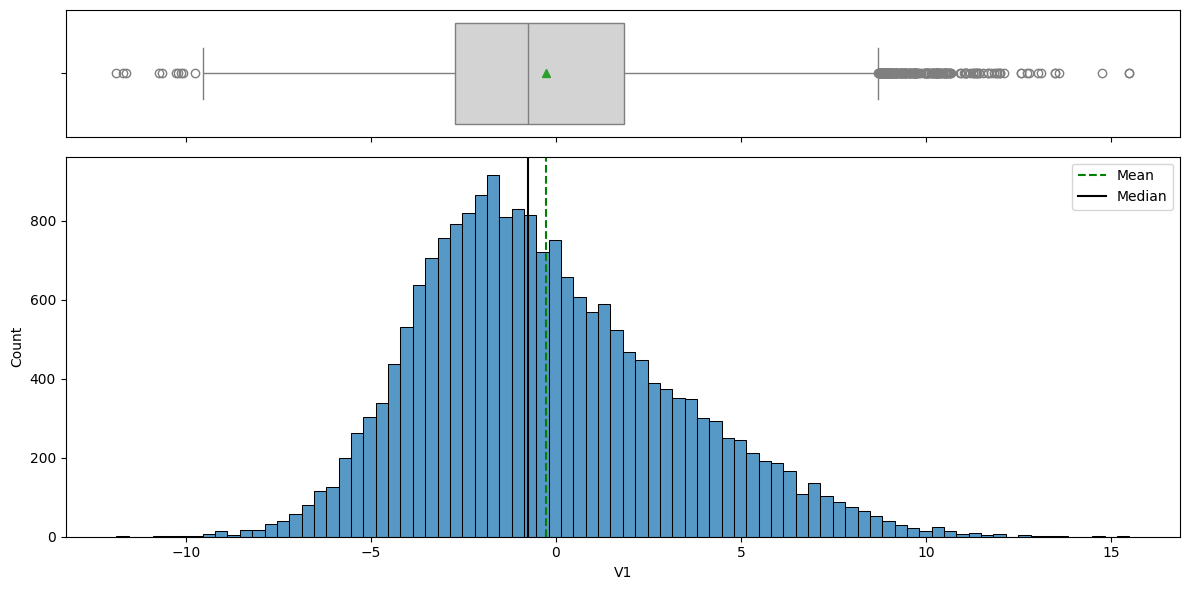

Univariate distribution for: V2


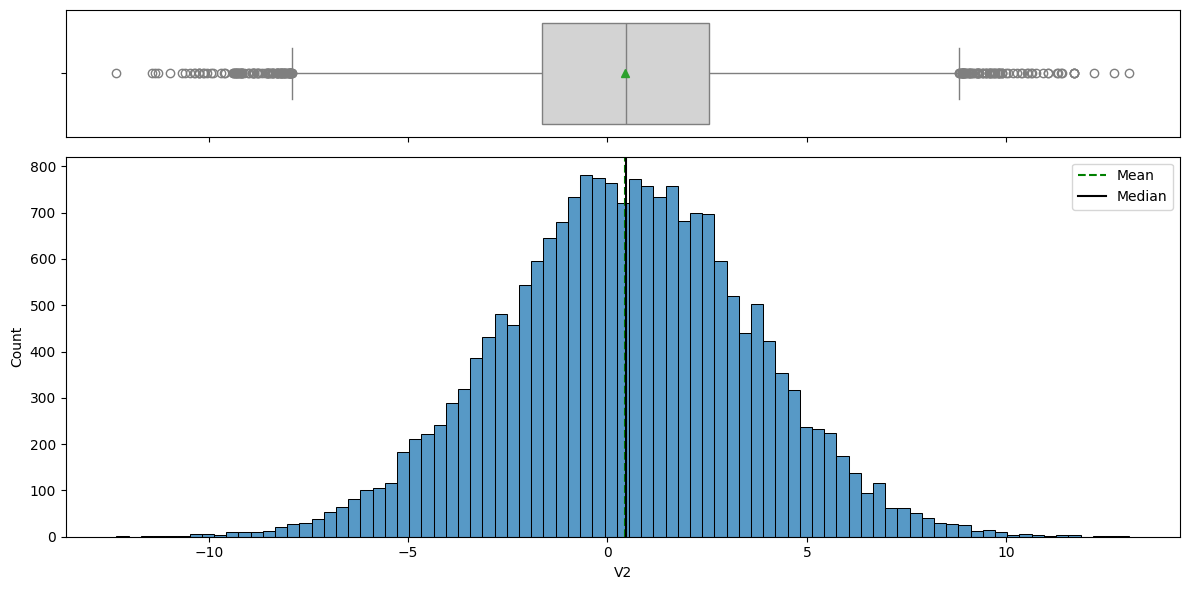

Univariate distribution for: V3


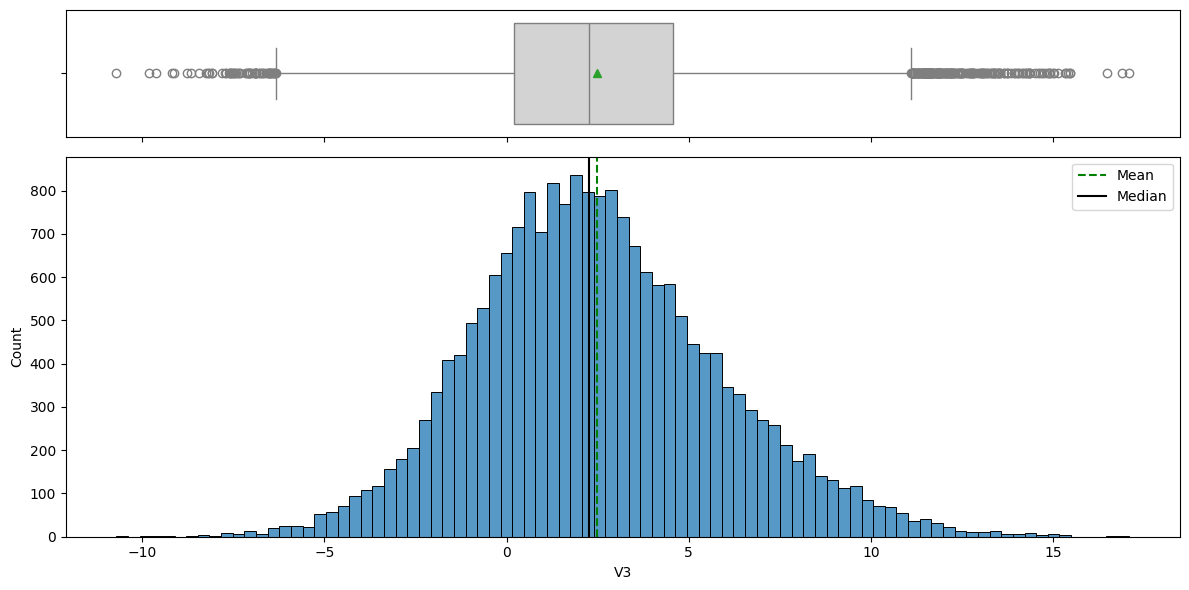

Univariate distribution for: V4


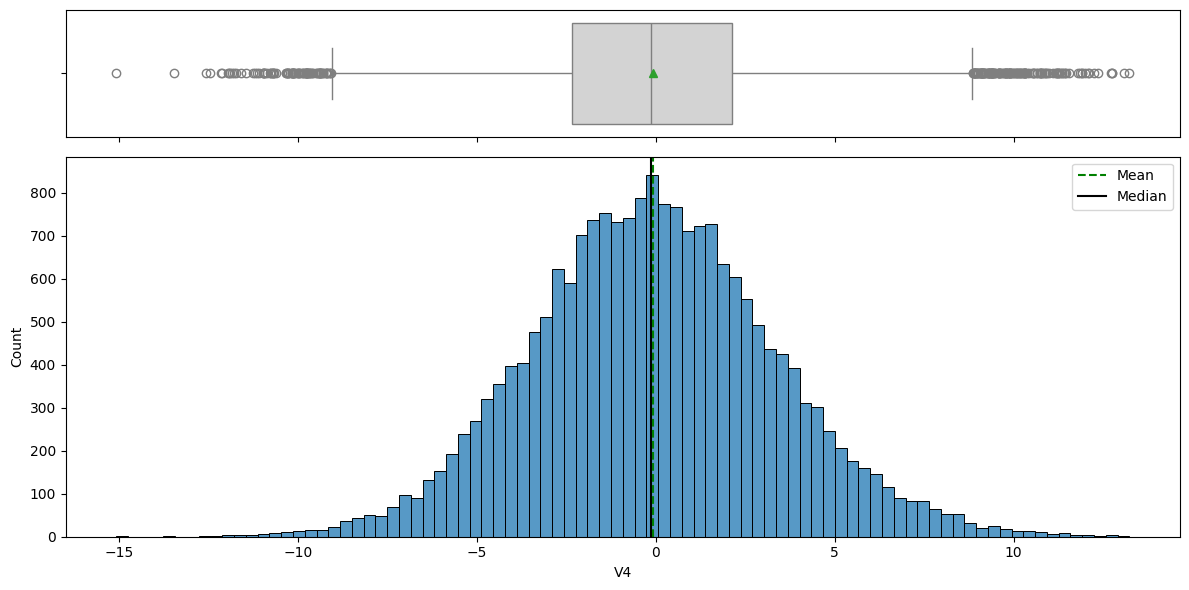

Univariate distribution for: V5


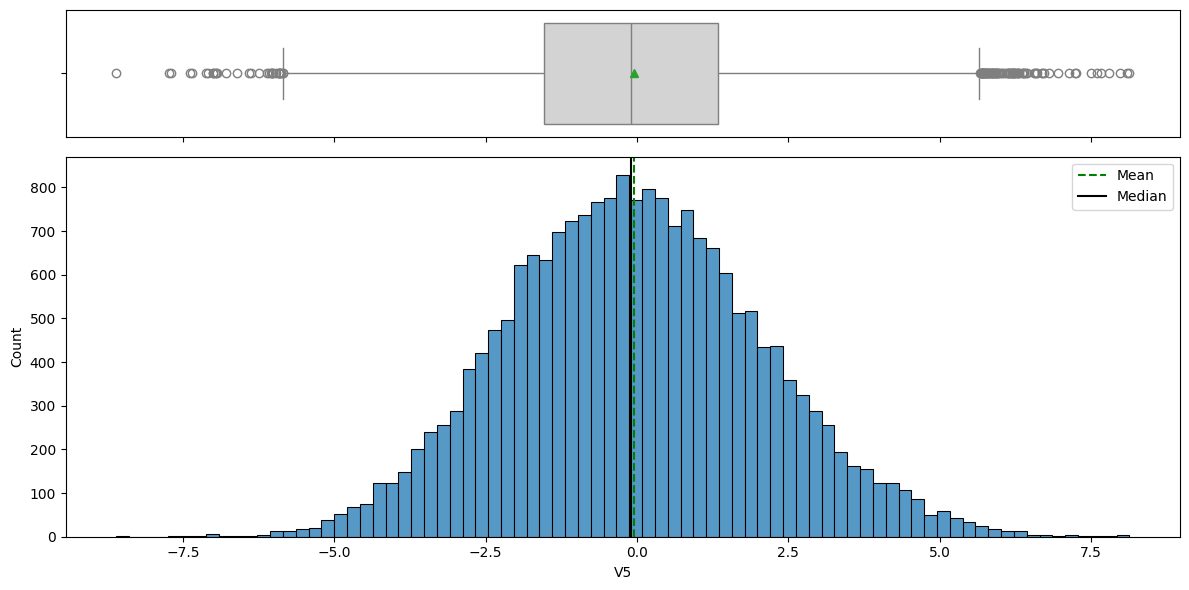

Univariate distribution for: V6


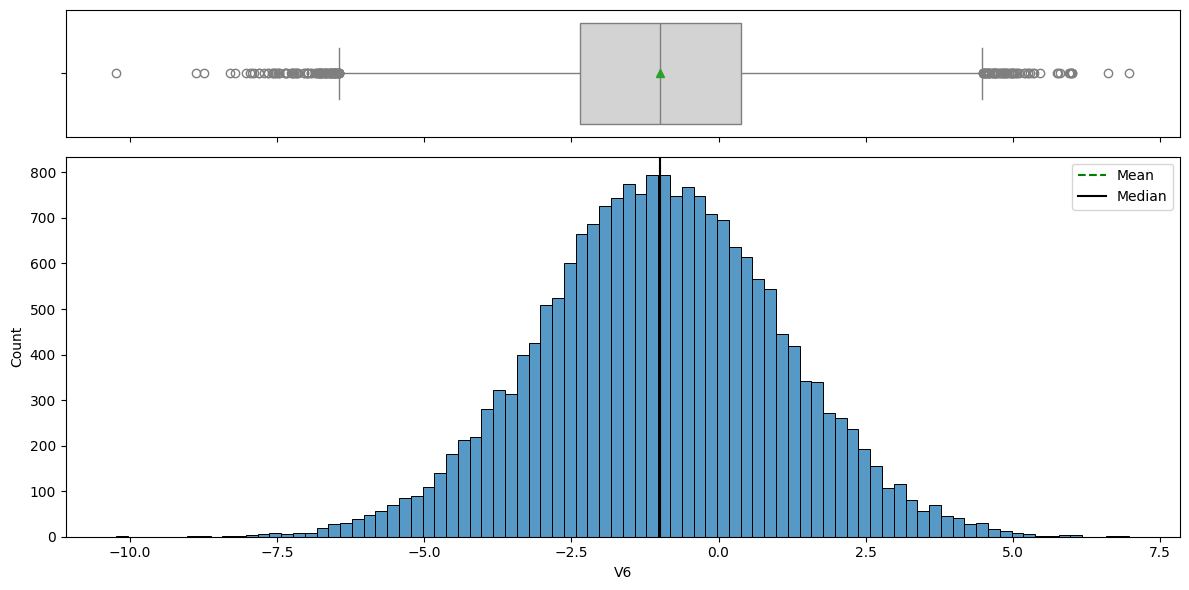

Univariate distribution for: V7


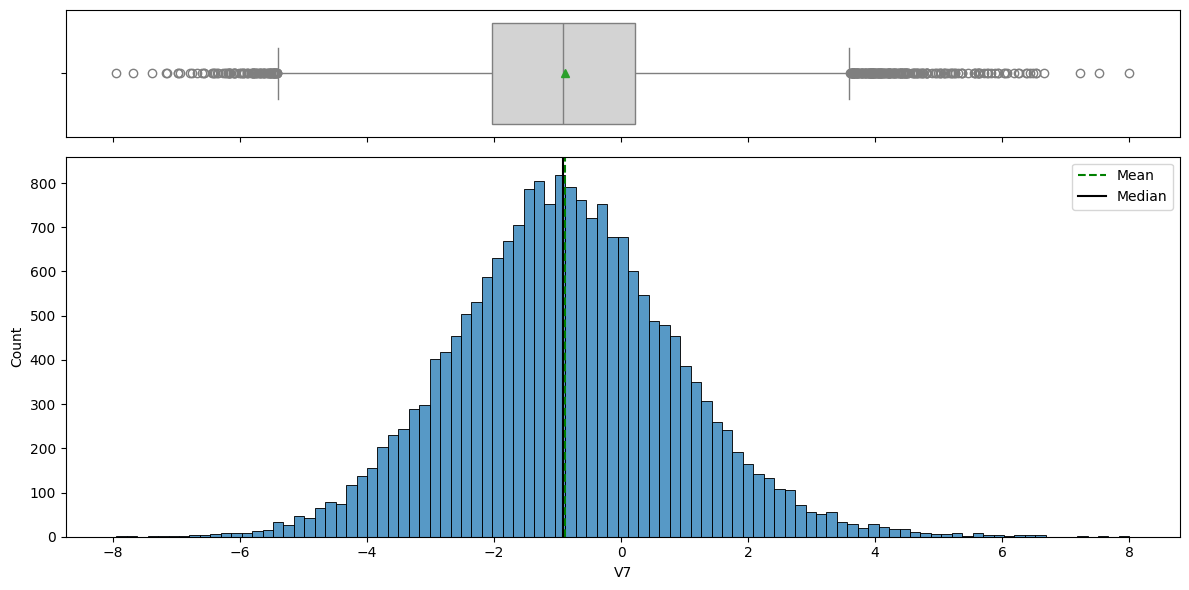

Univariate distribution for: V8


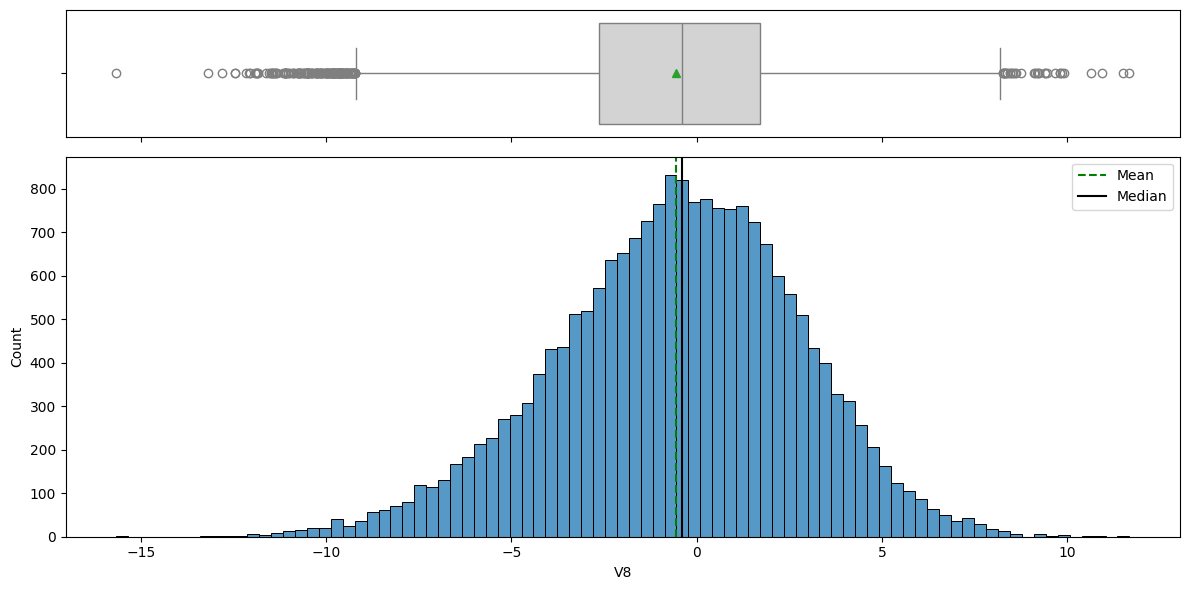

Univariate distribution for: V9


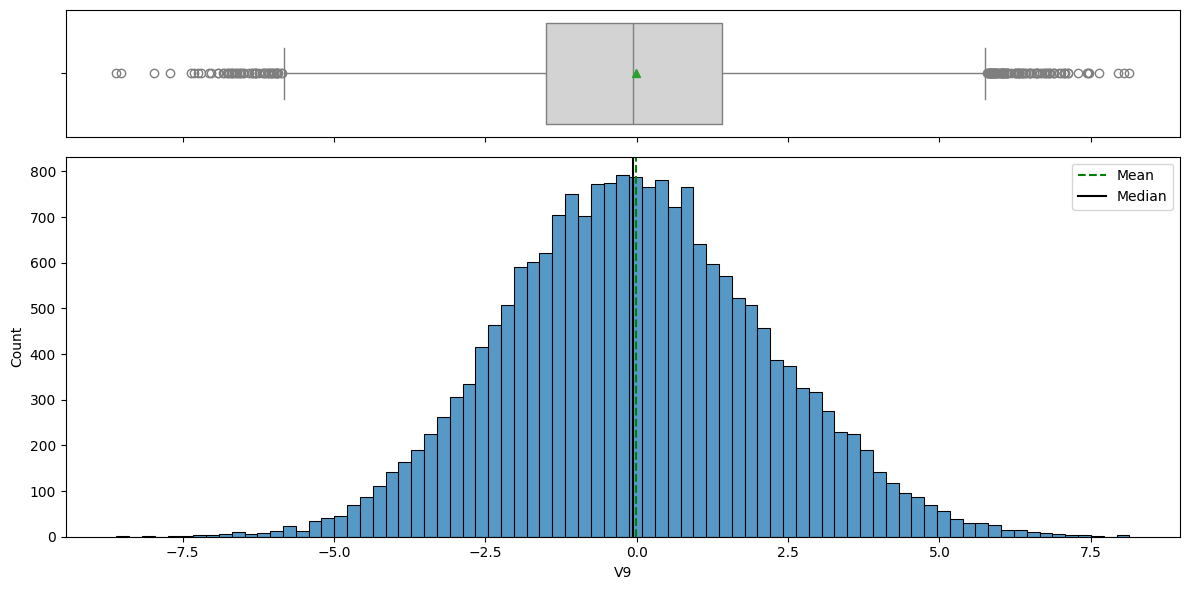

Univariate distribution for: V10


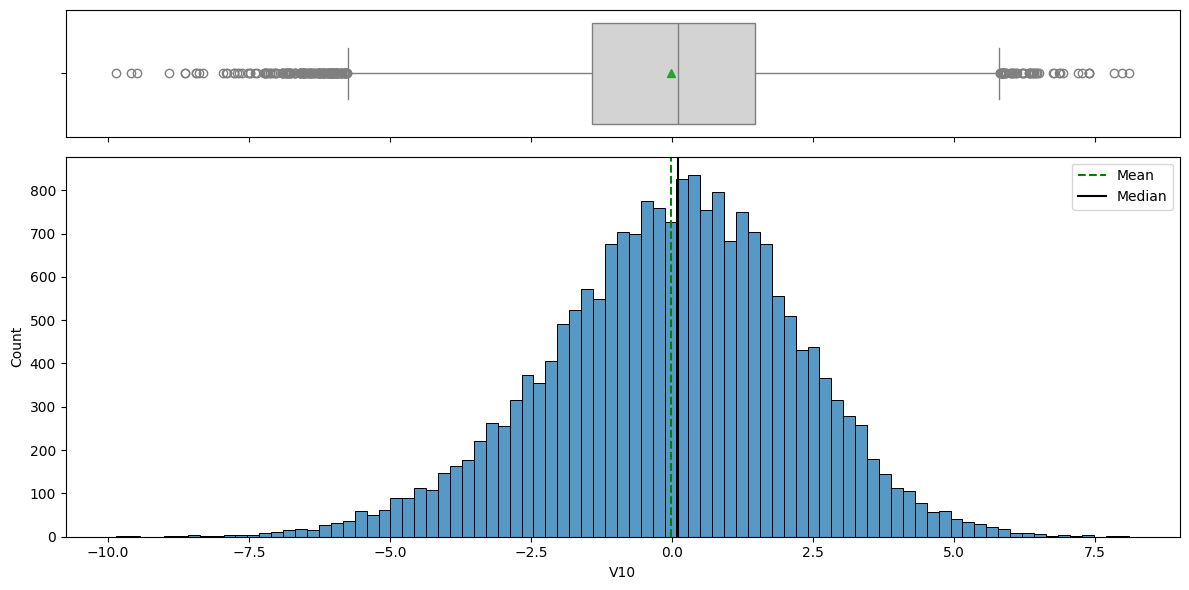

Univariate distribution for: V11


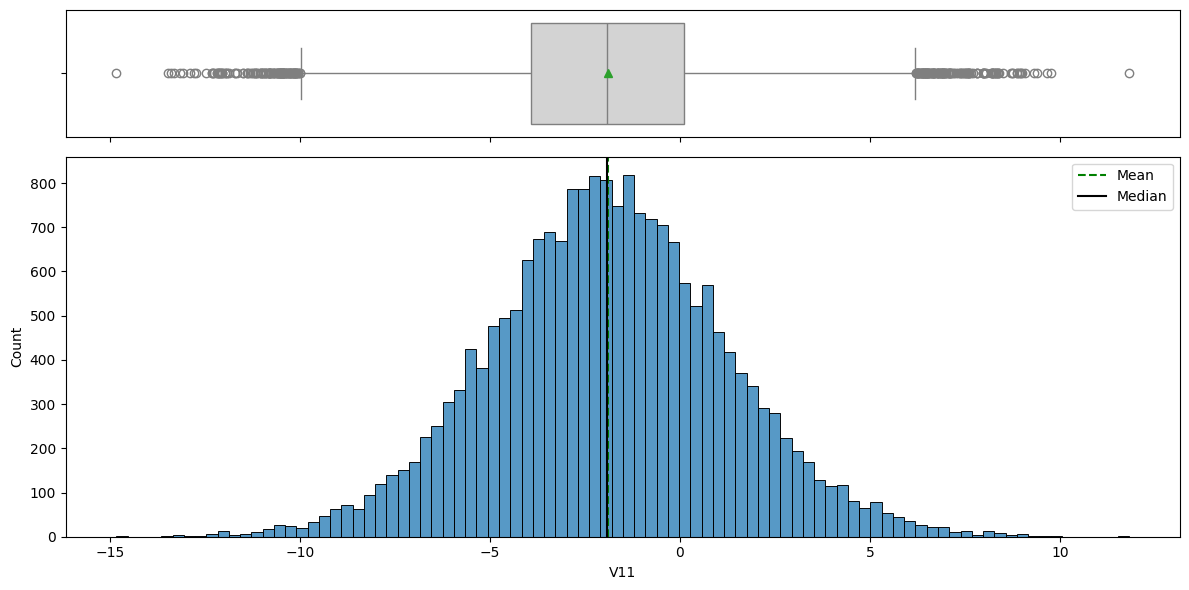

Univariate distribution for: V12


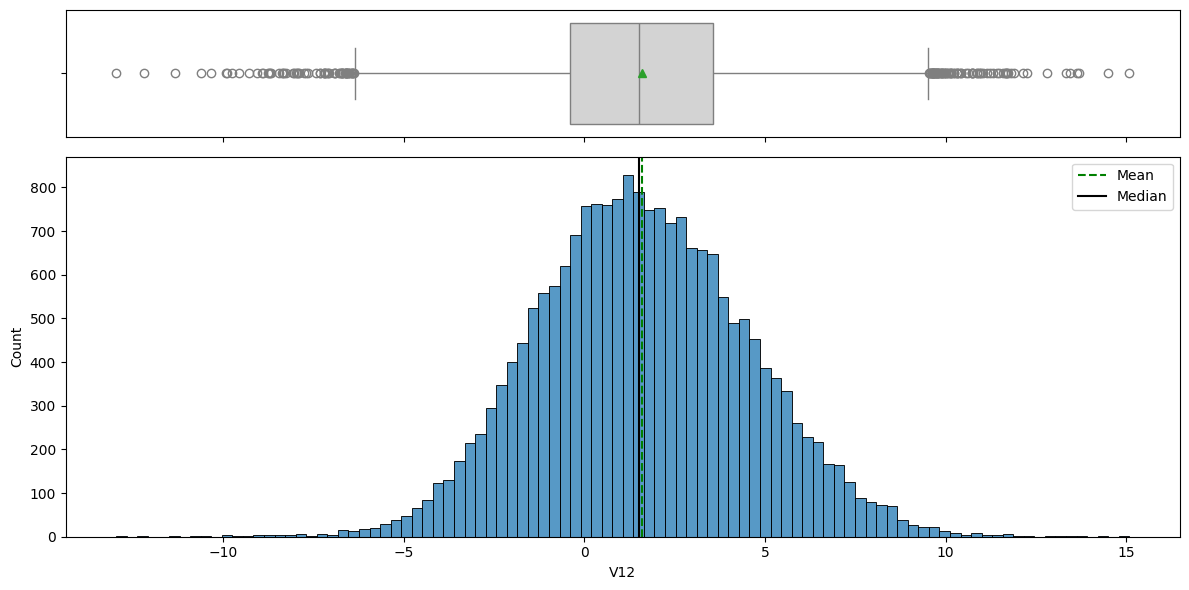

Univariate distribution for: V13


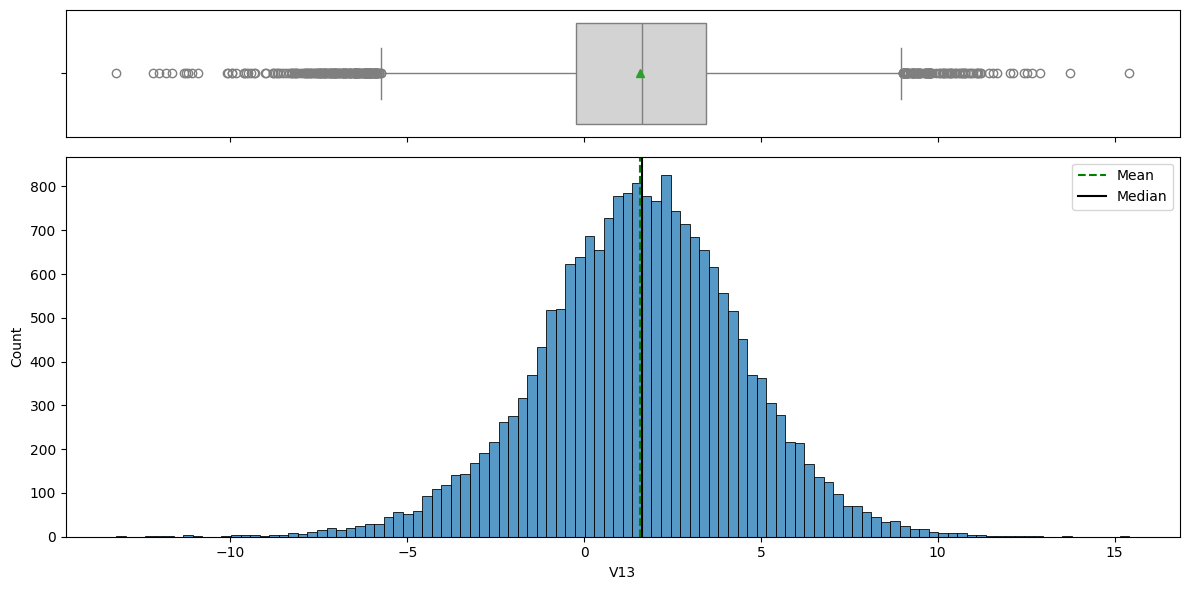

Univariate distribution for: V14


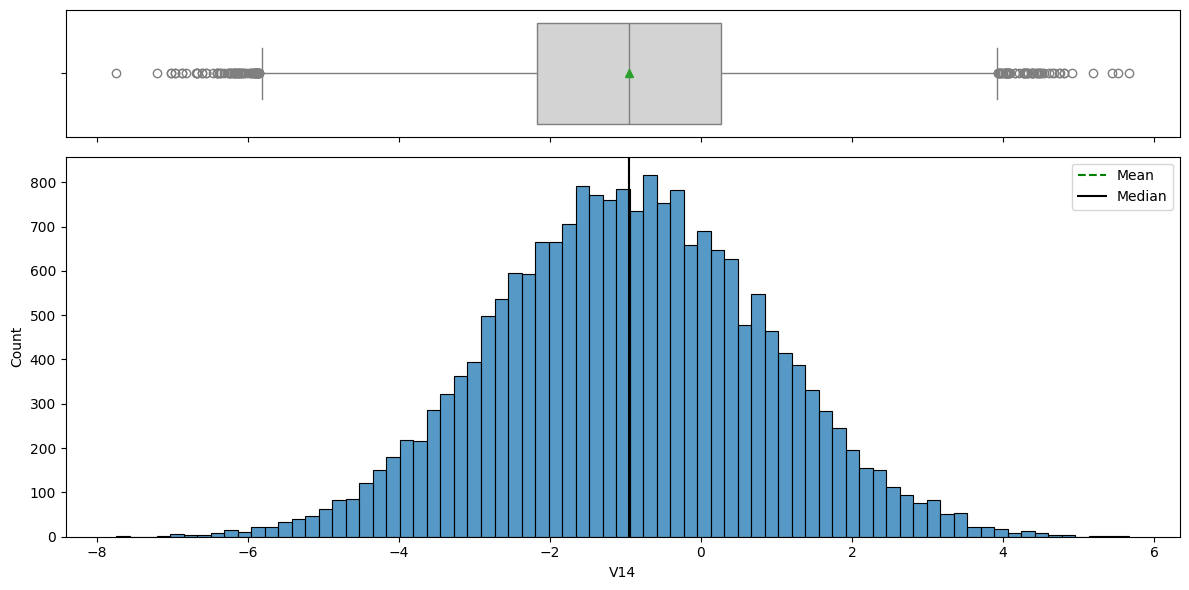

Univariate distribution for: V15


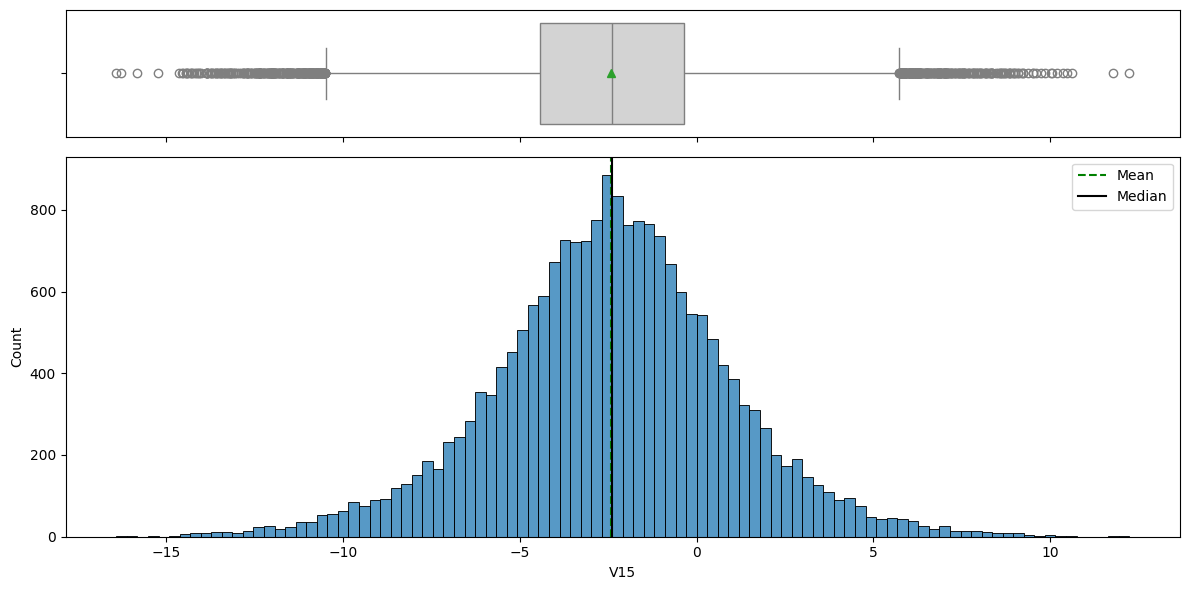

Univariate distribution for: V16


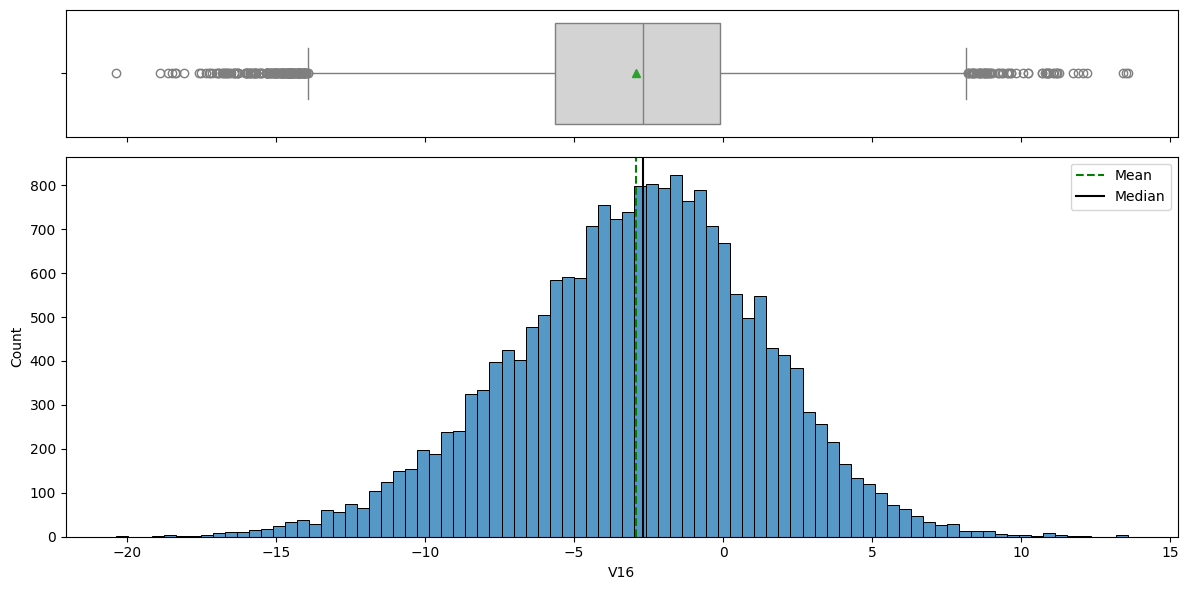

Univariate distribution for: V17


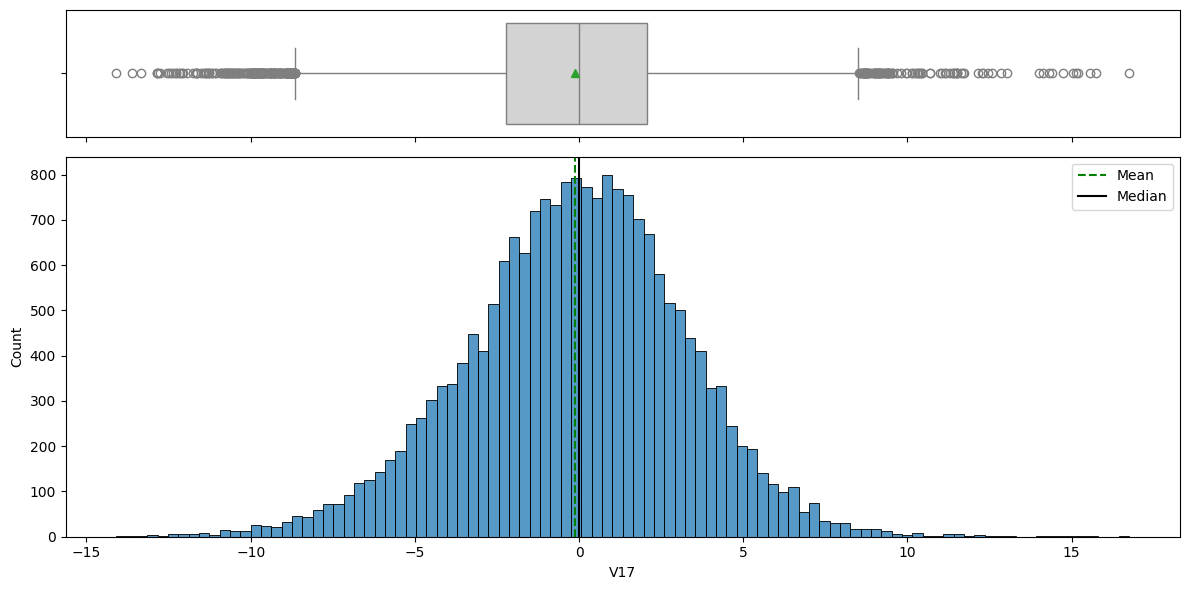

Univariate distribution for: V18


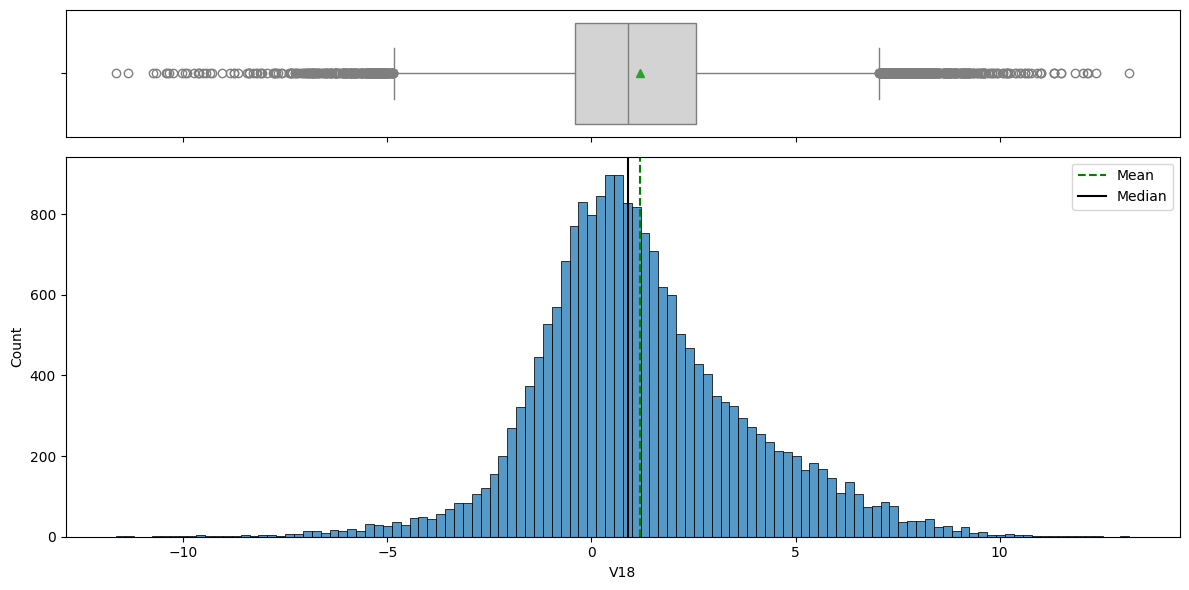

Univariate distribution for: V19


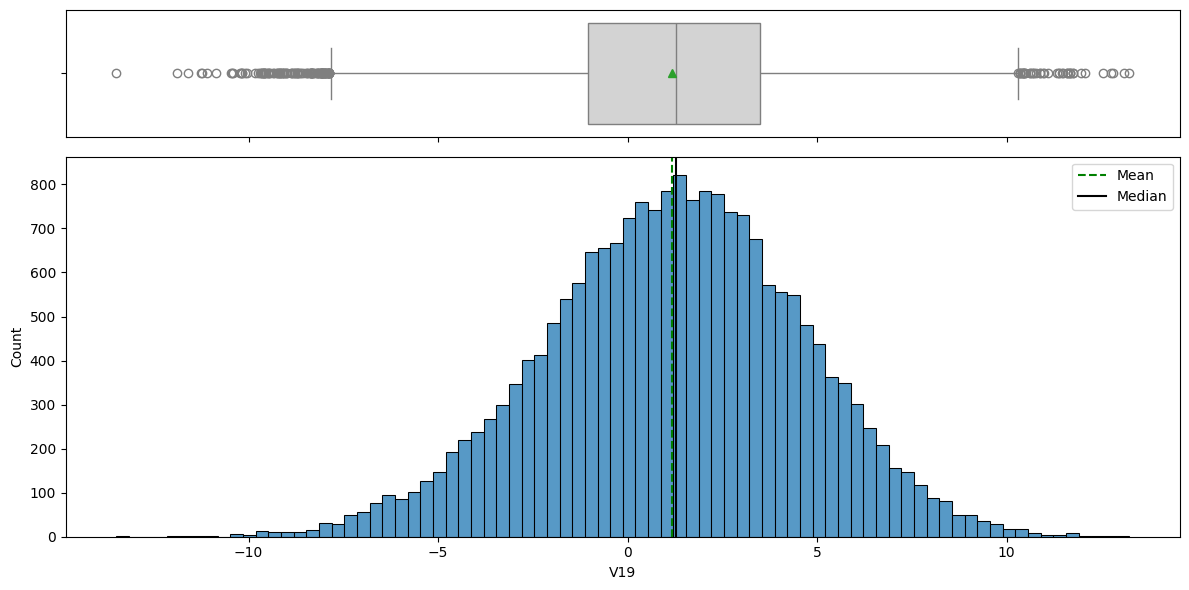

Univariate distribution for: V20


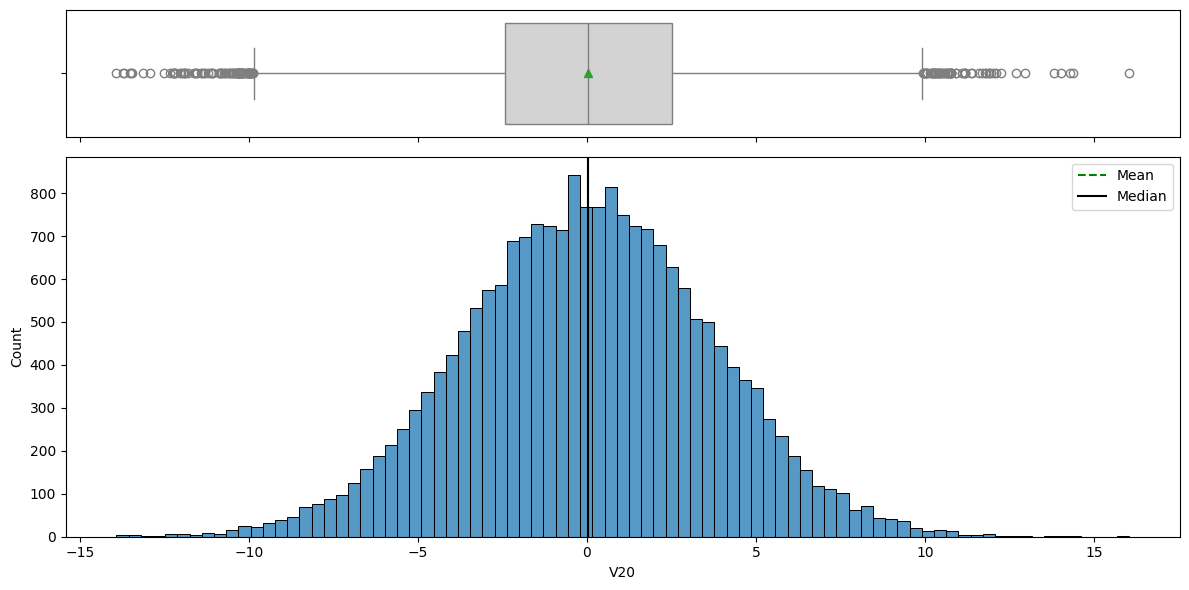

Univariate distribution for: V21


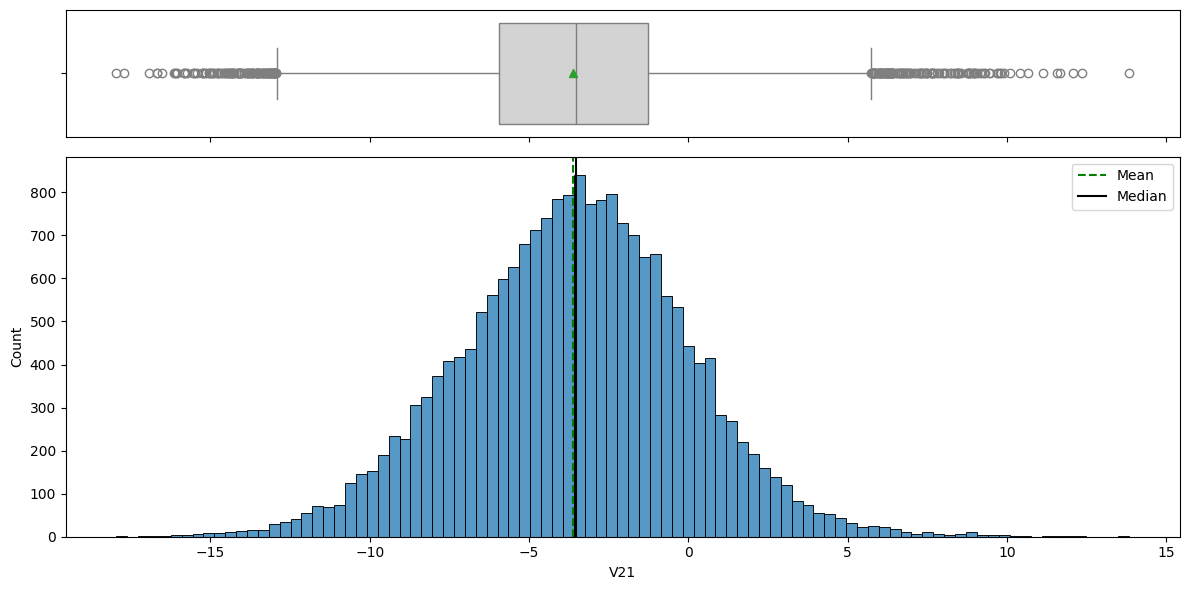

Univariate distribution for: V22


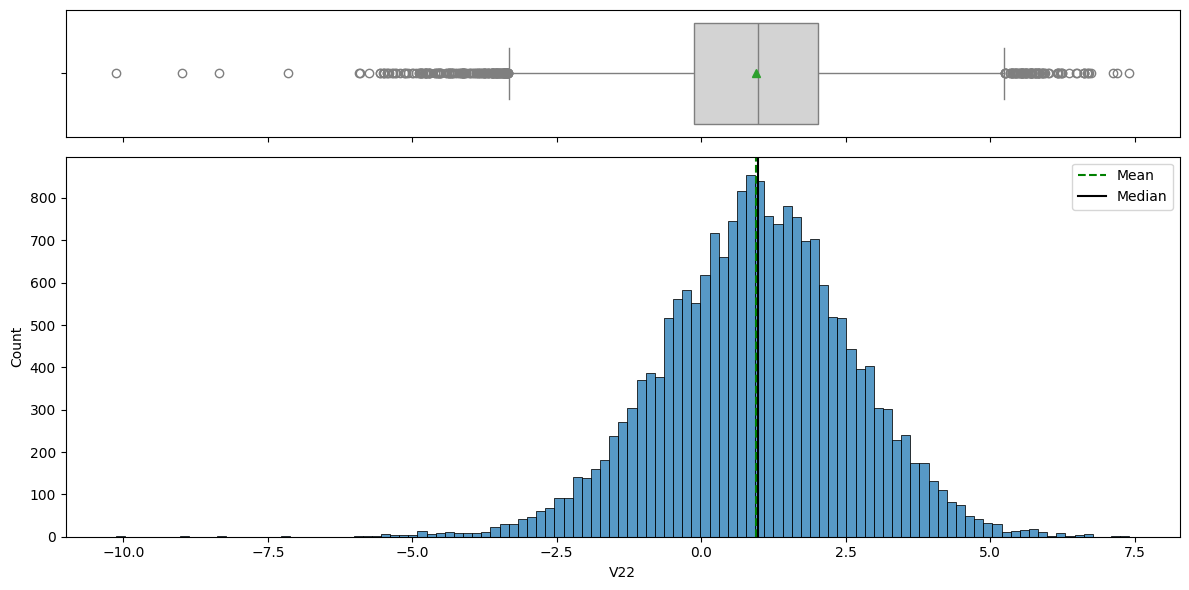

Univariate distribution for: V23


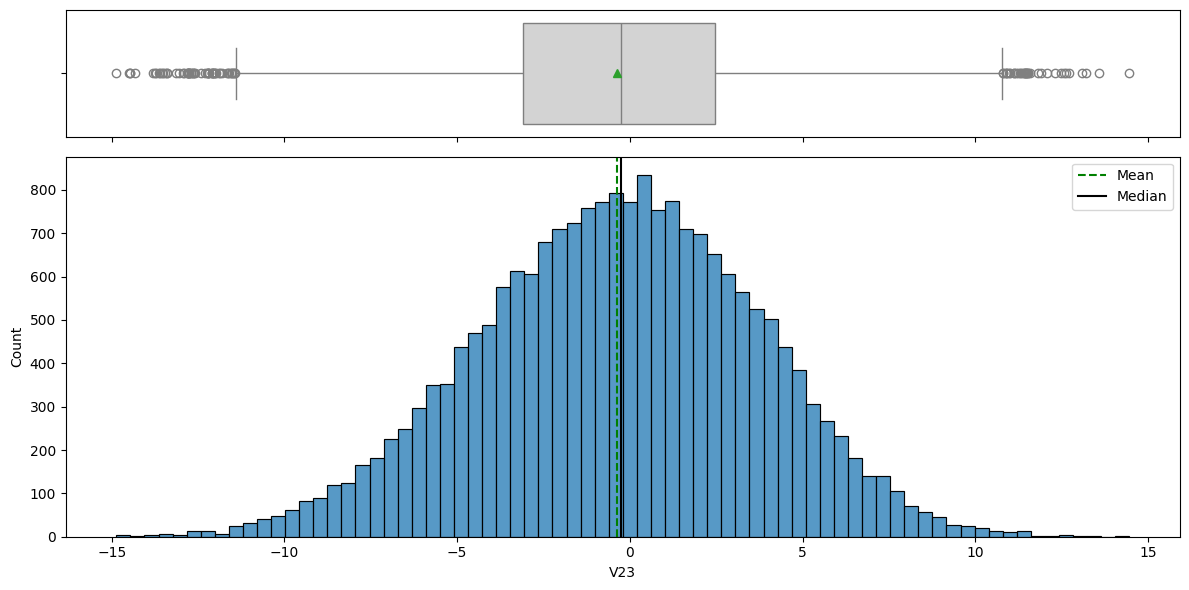

Univariate distribution for: V24


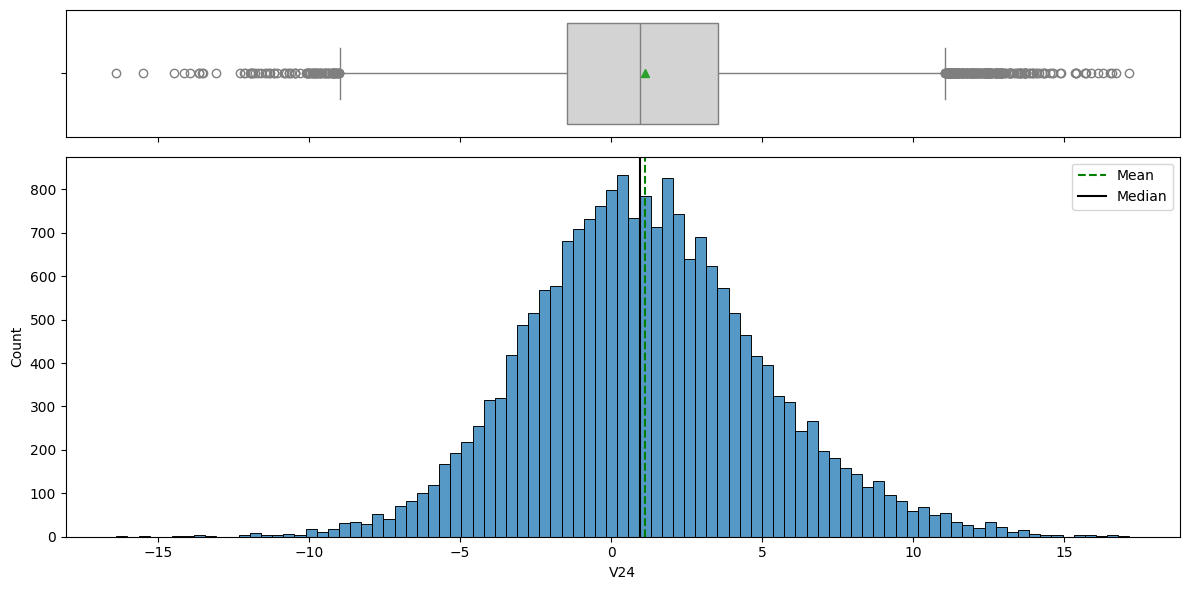

Univariate distribution for: V25


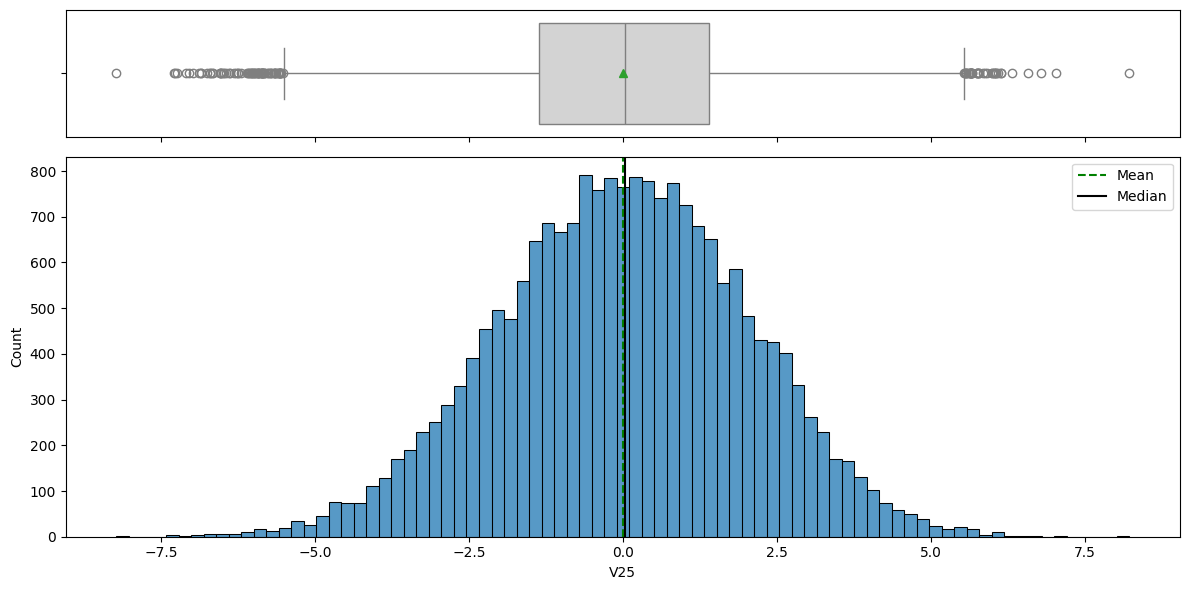

Univariate distribution for: V26


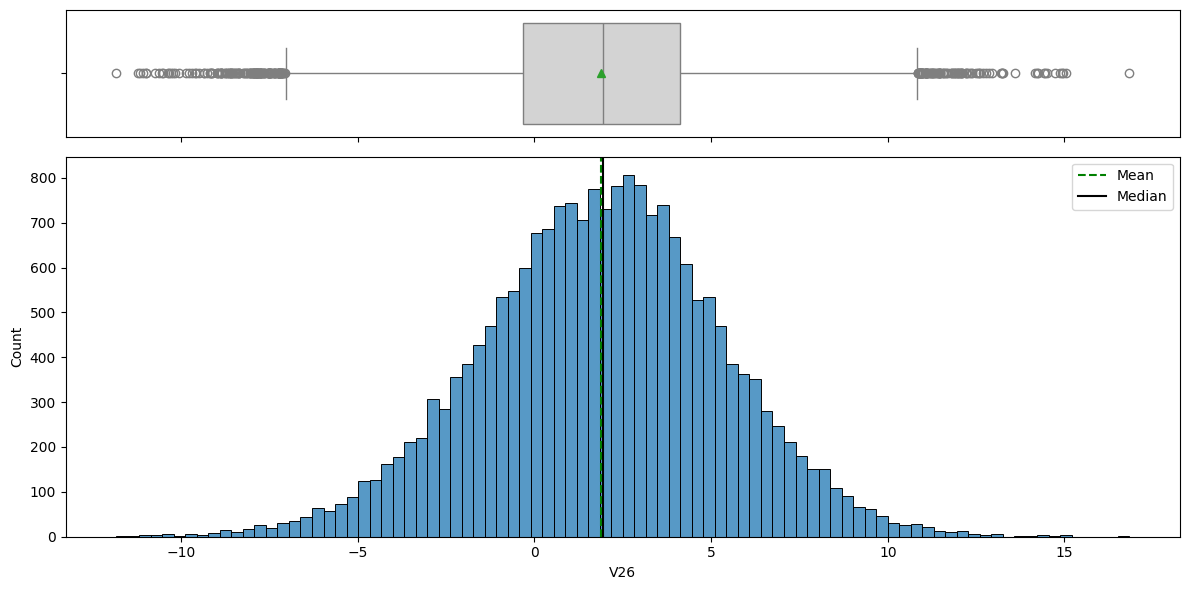

Univariate distribution for: V27


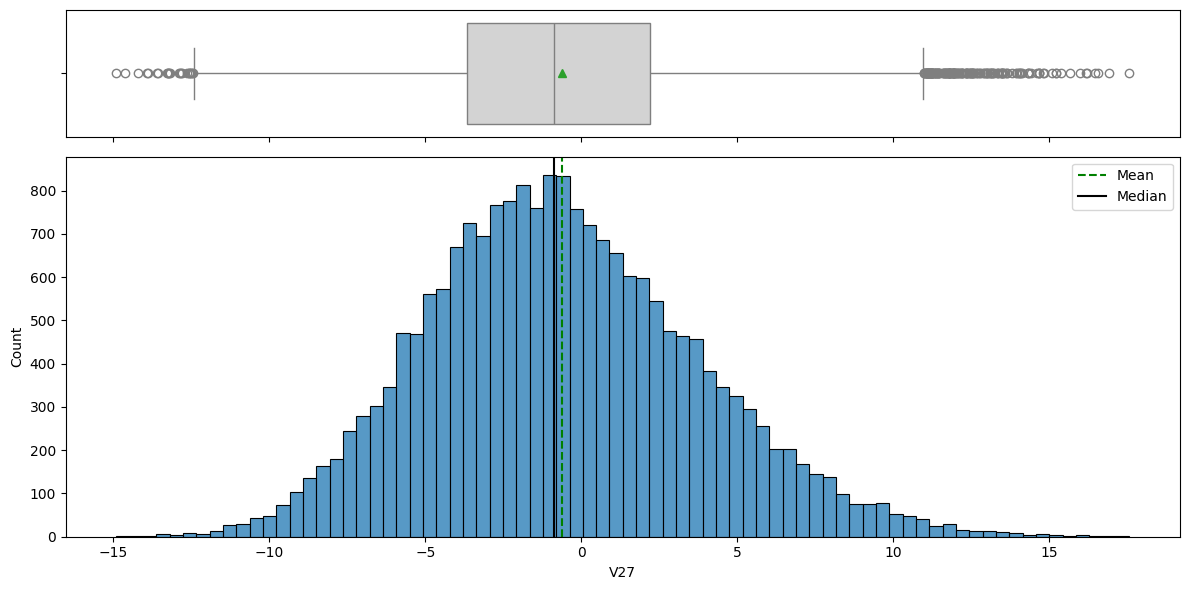

Univariate distribution for: V28


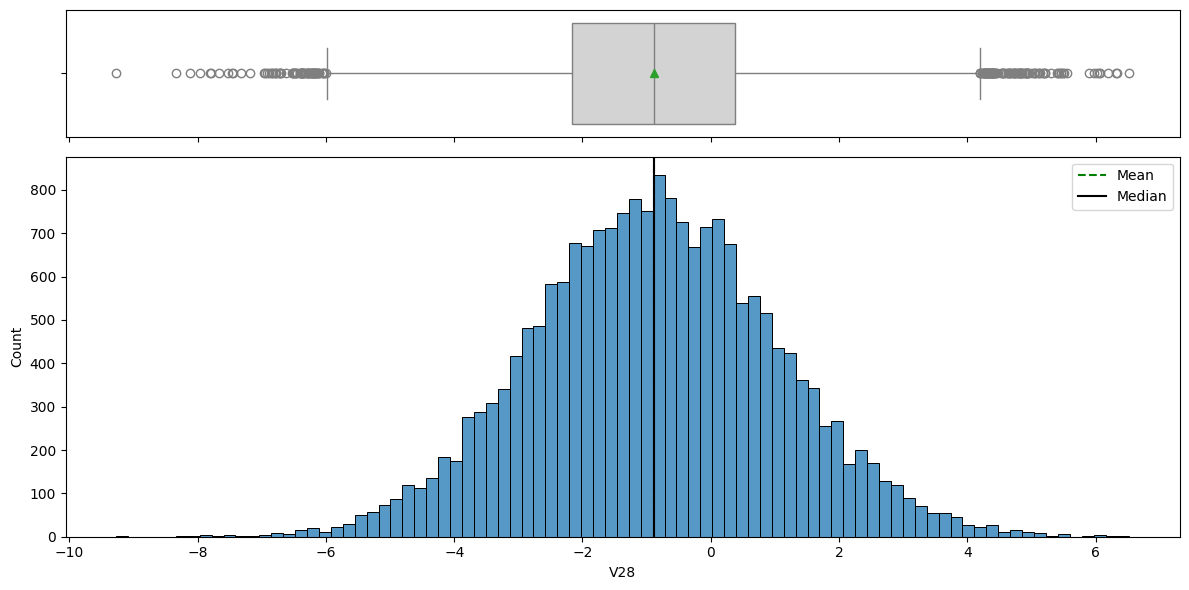

Univariate distribution for: V29


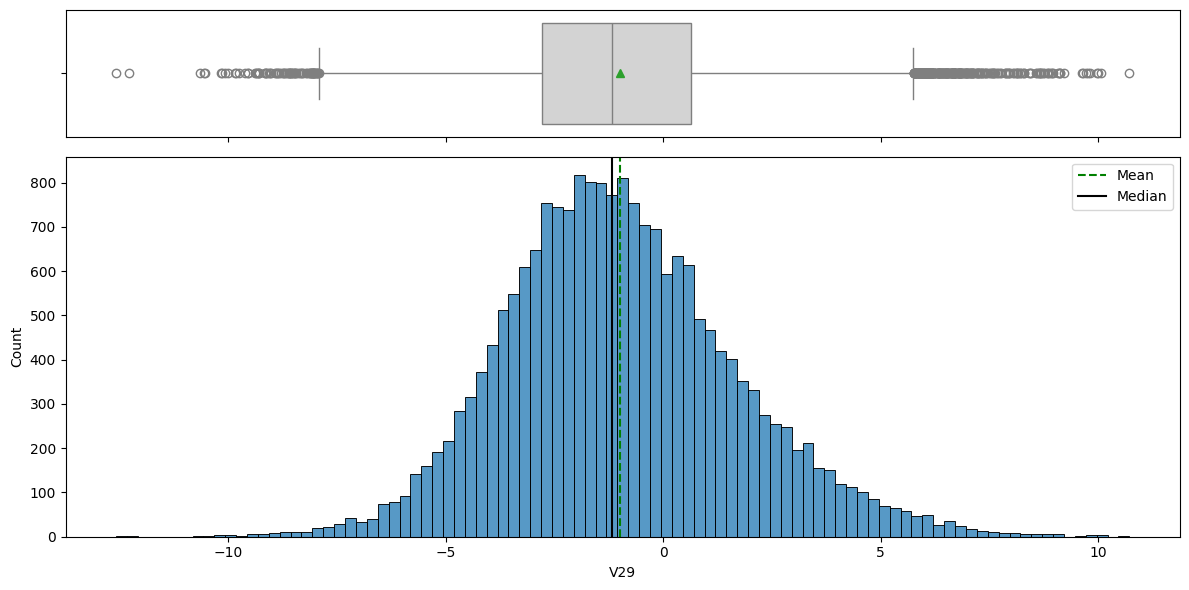

Univariate distribution for: V30


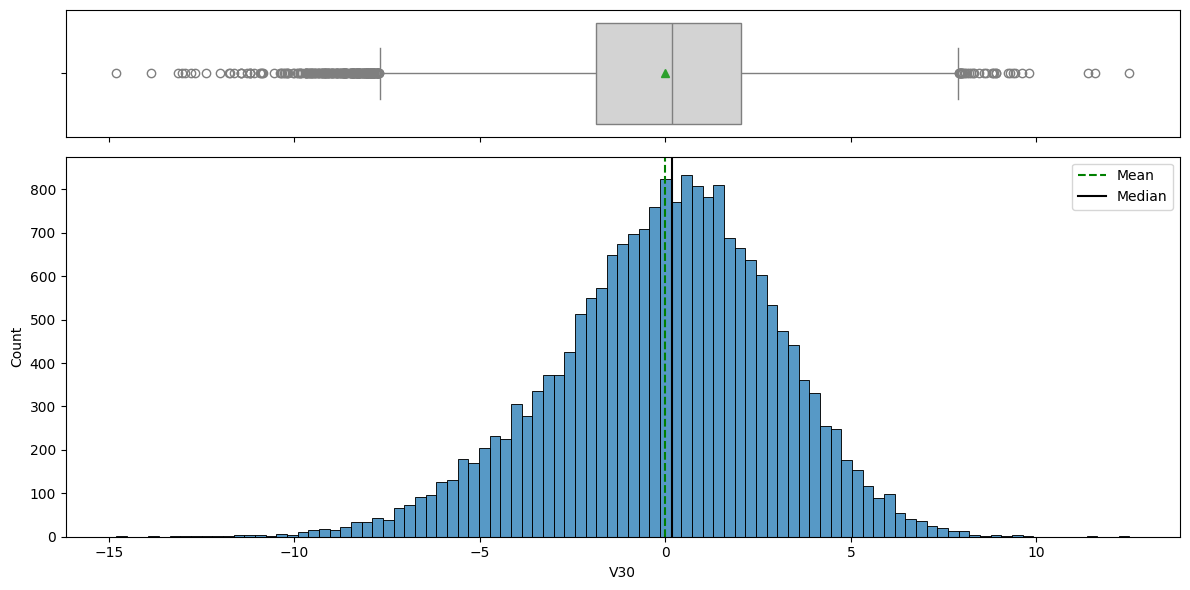

Univariate distribution for: V31


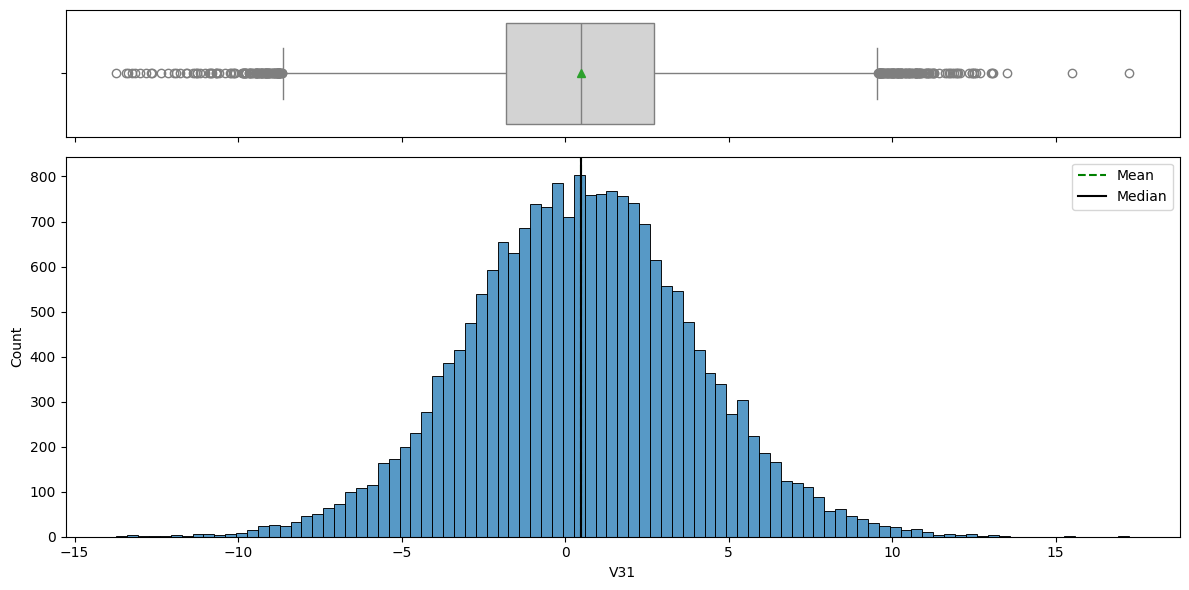

Univariate distribution for: V32


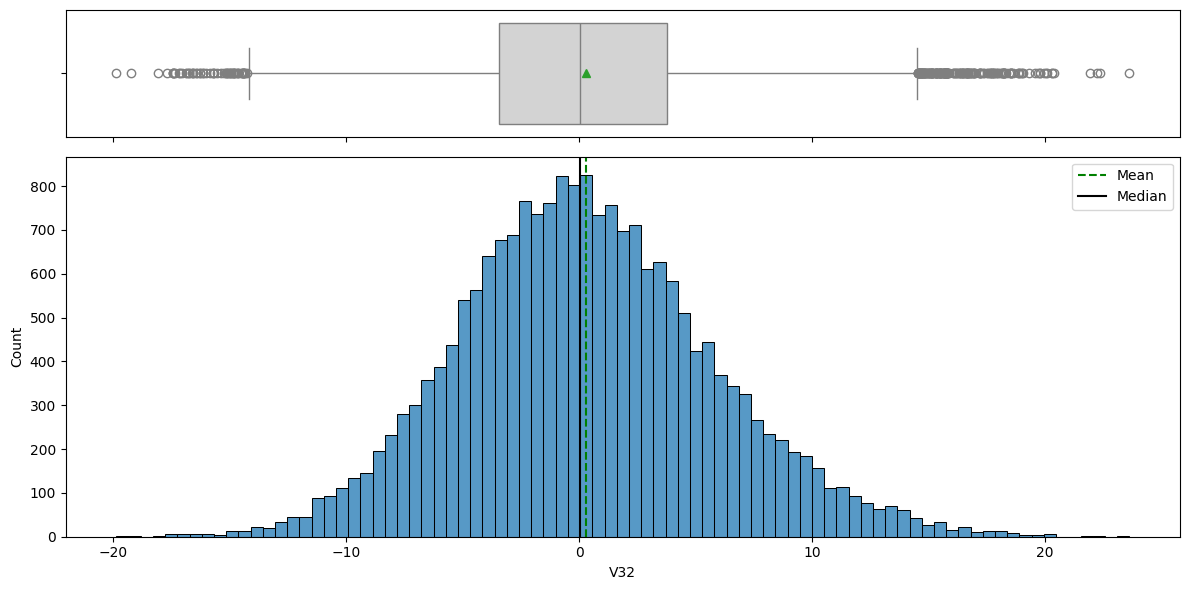

Univariate distribution for: V33


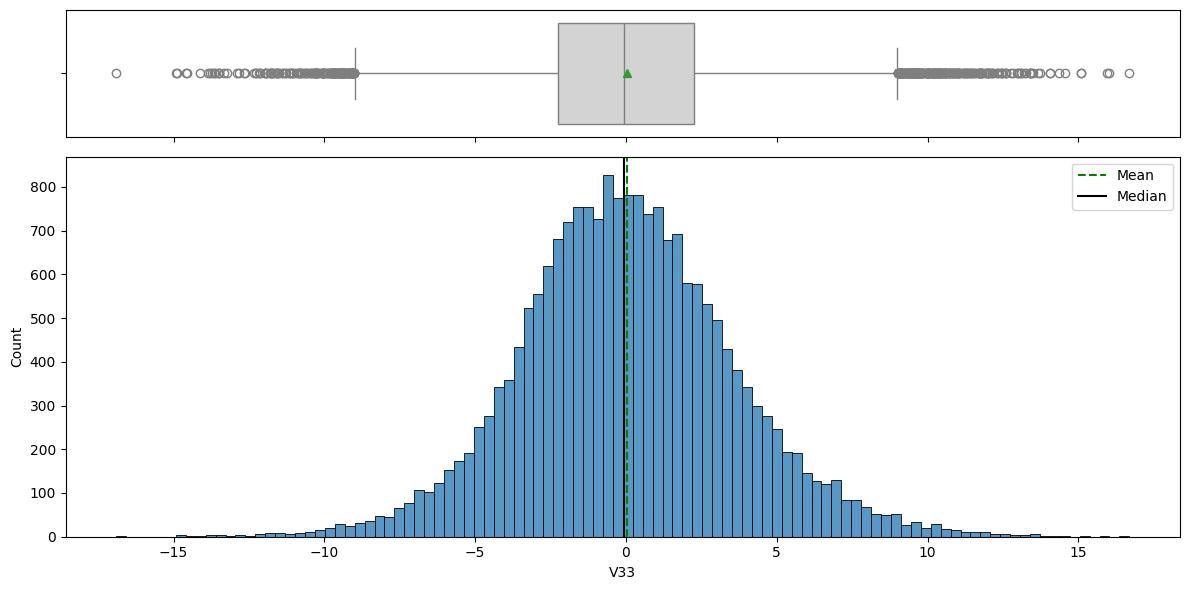

Univariate distribution for: V34


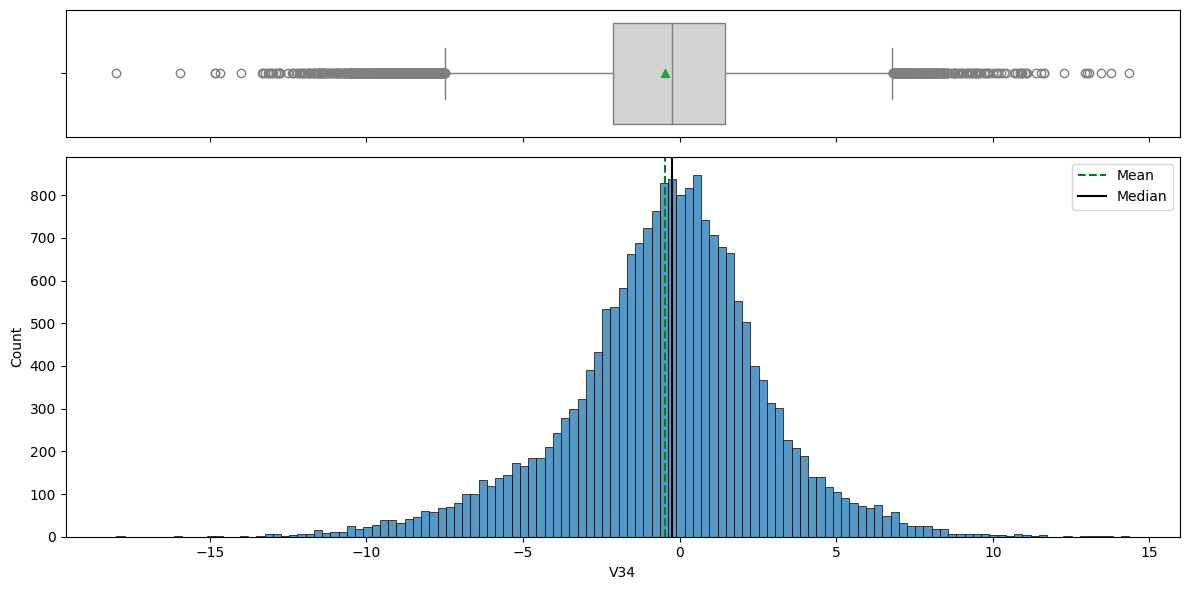

Univariate distribution for: V35


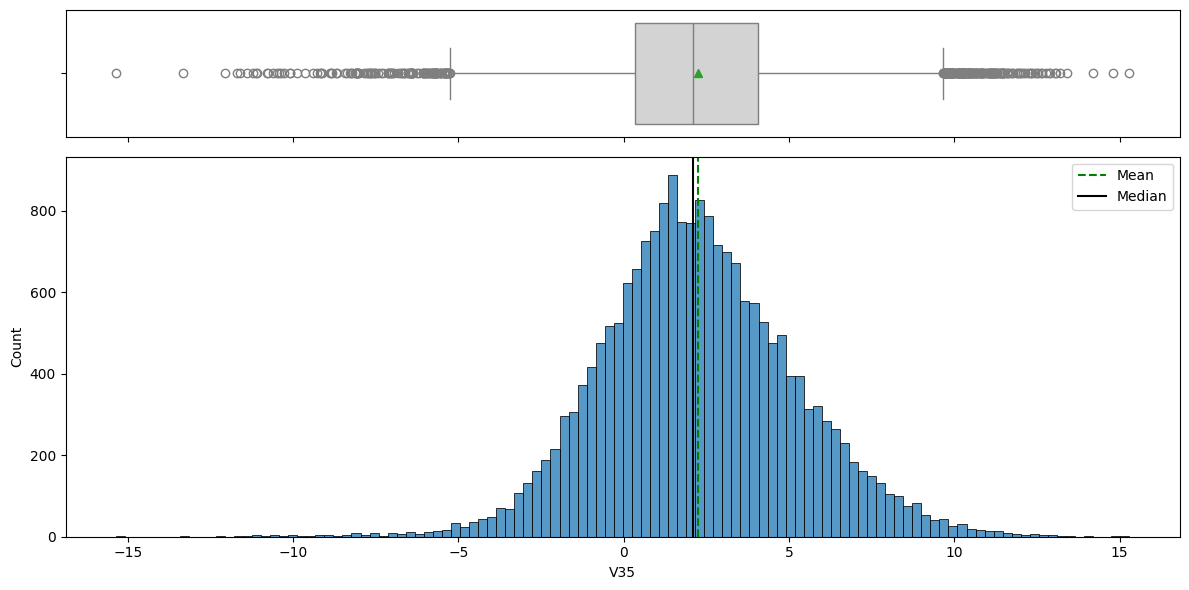

Univariate distribution for: V36


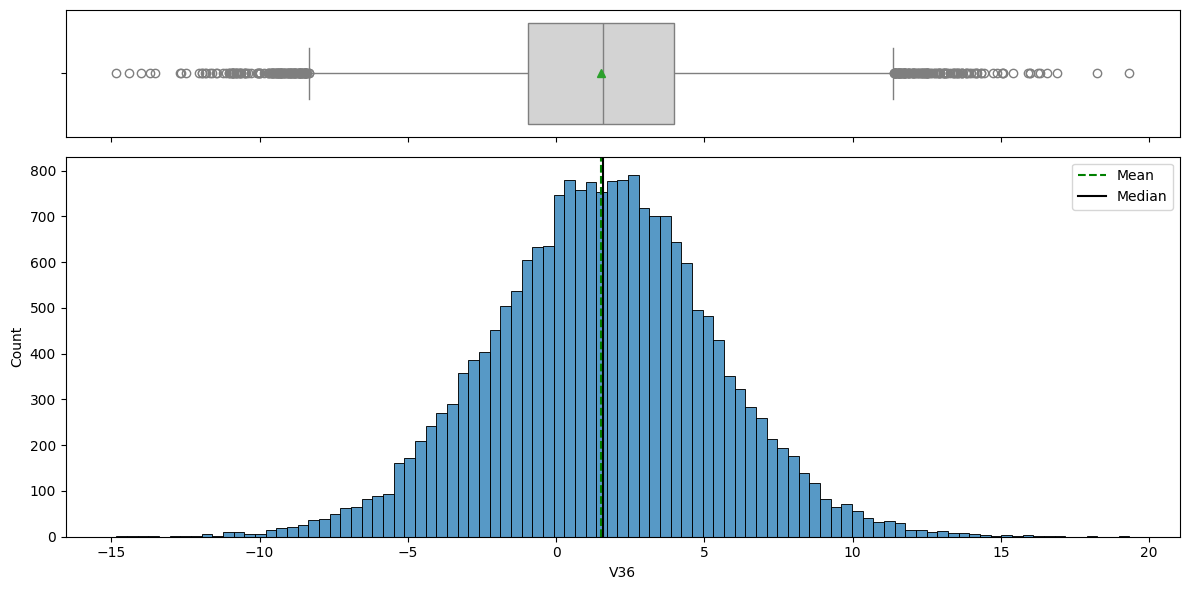

Univariate distribution for: V37


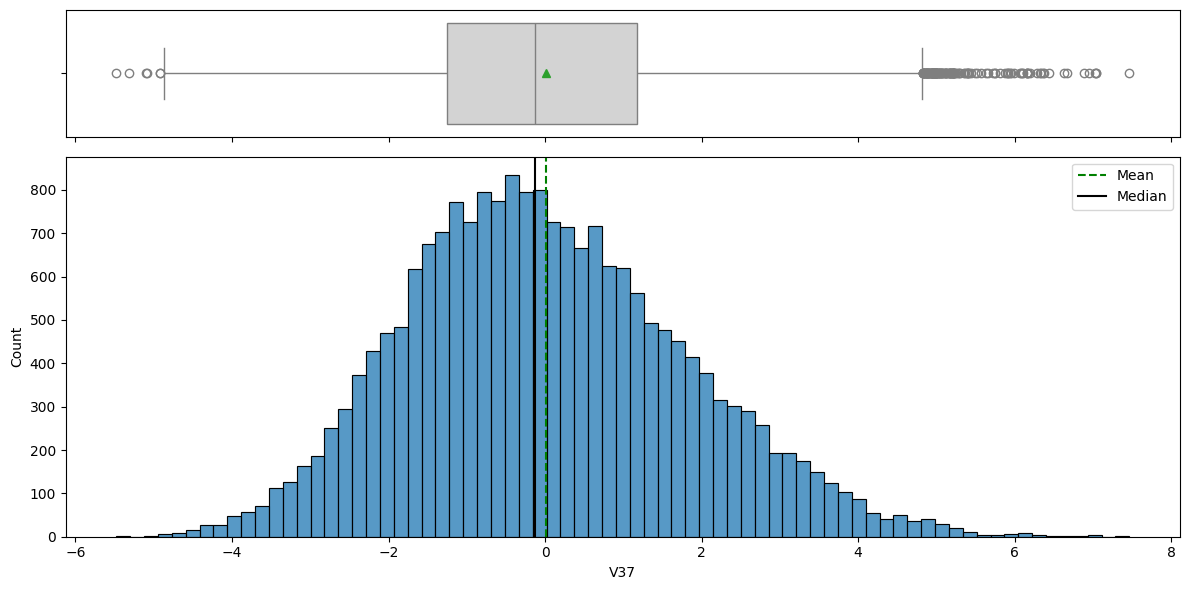

Univariate distribution for: V38


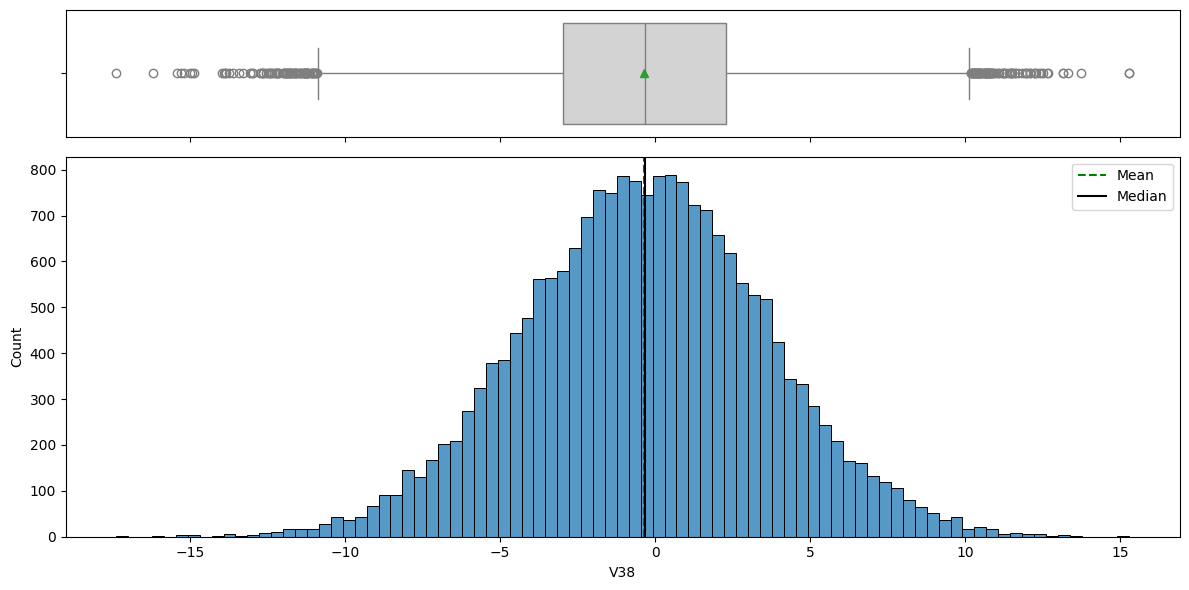

Univariate distribution for: V39


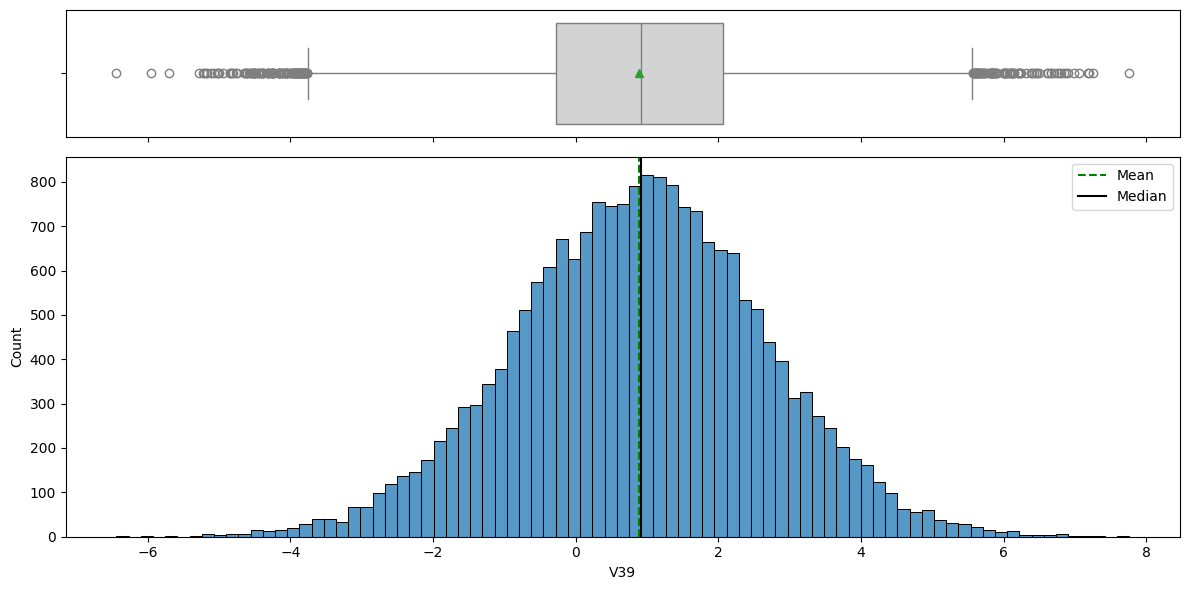

Univariate distribution for: V40


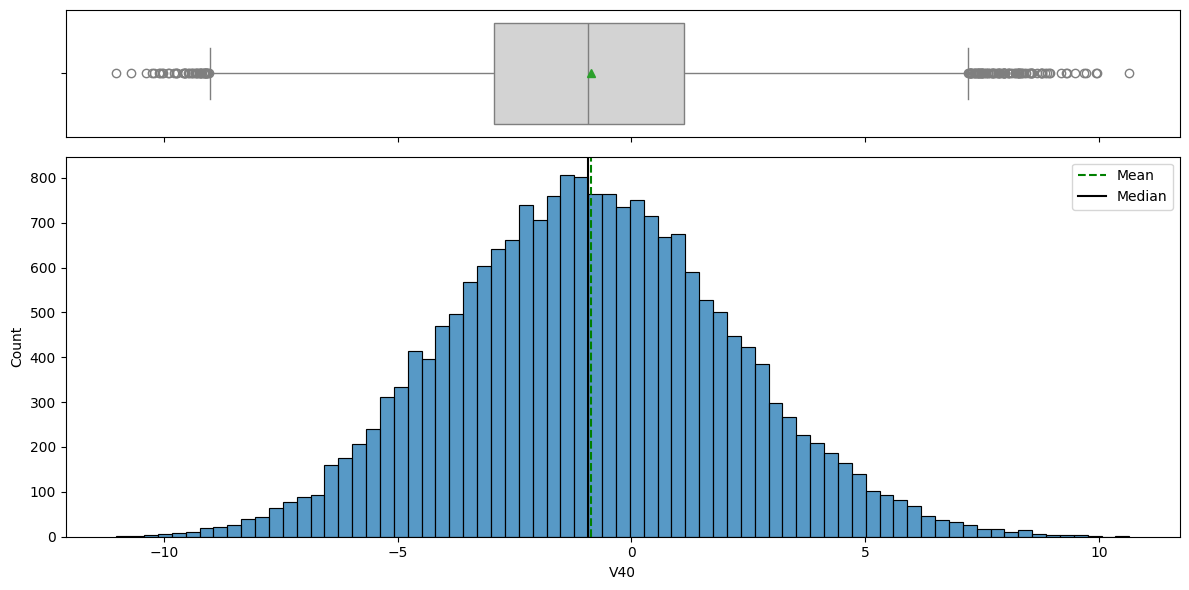

B) BIVARIATE ANALYSIS (with respect to Target)

B.1 Mean of numeric features by target class (training data):


Target,0.0,1.0
V1,-0.333182,0.768272
V2,0.441153,0.428143
V3,2.660379,-0.505019
V4,-0.175306,1.485127
V5,-0.002463,-0.926582
V6,-0.995560,-0.993451
V7,-0.980488,0.842285
V8,-0.656842,1.300756
V9,-0.021063,0.055604
V10,0.014255,-0.476792


Notes:
- Columns with large differences between Target=0 and Target=1 are more discriminative.

B.2 Correlation heatmap for numeric predictors (training data):


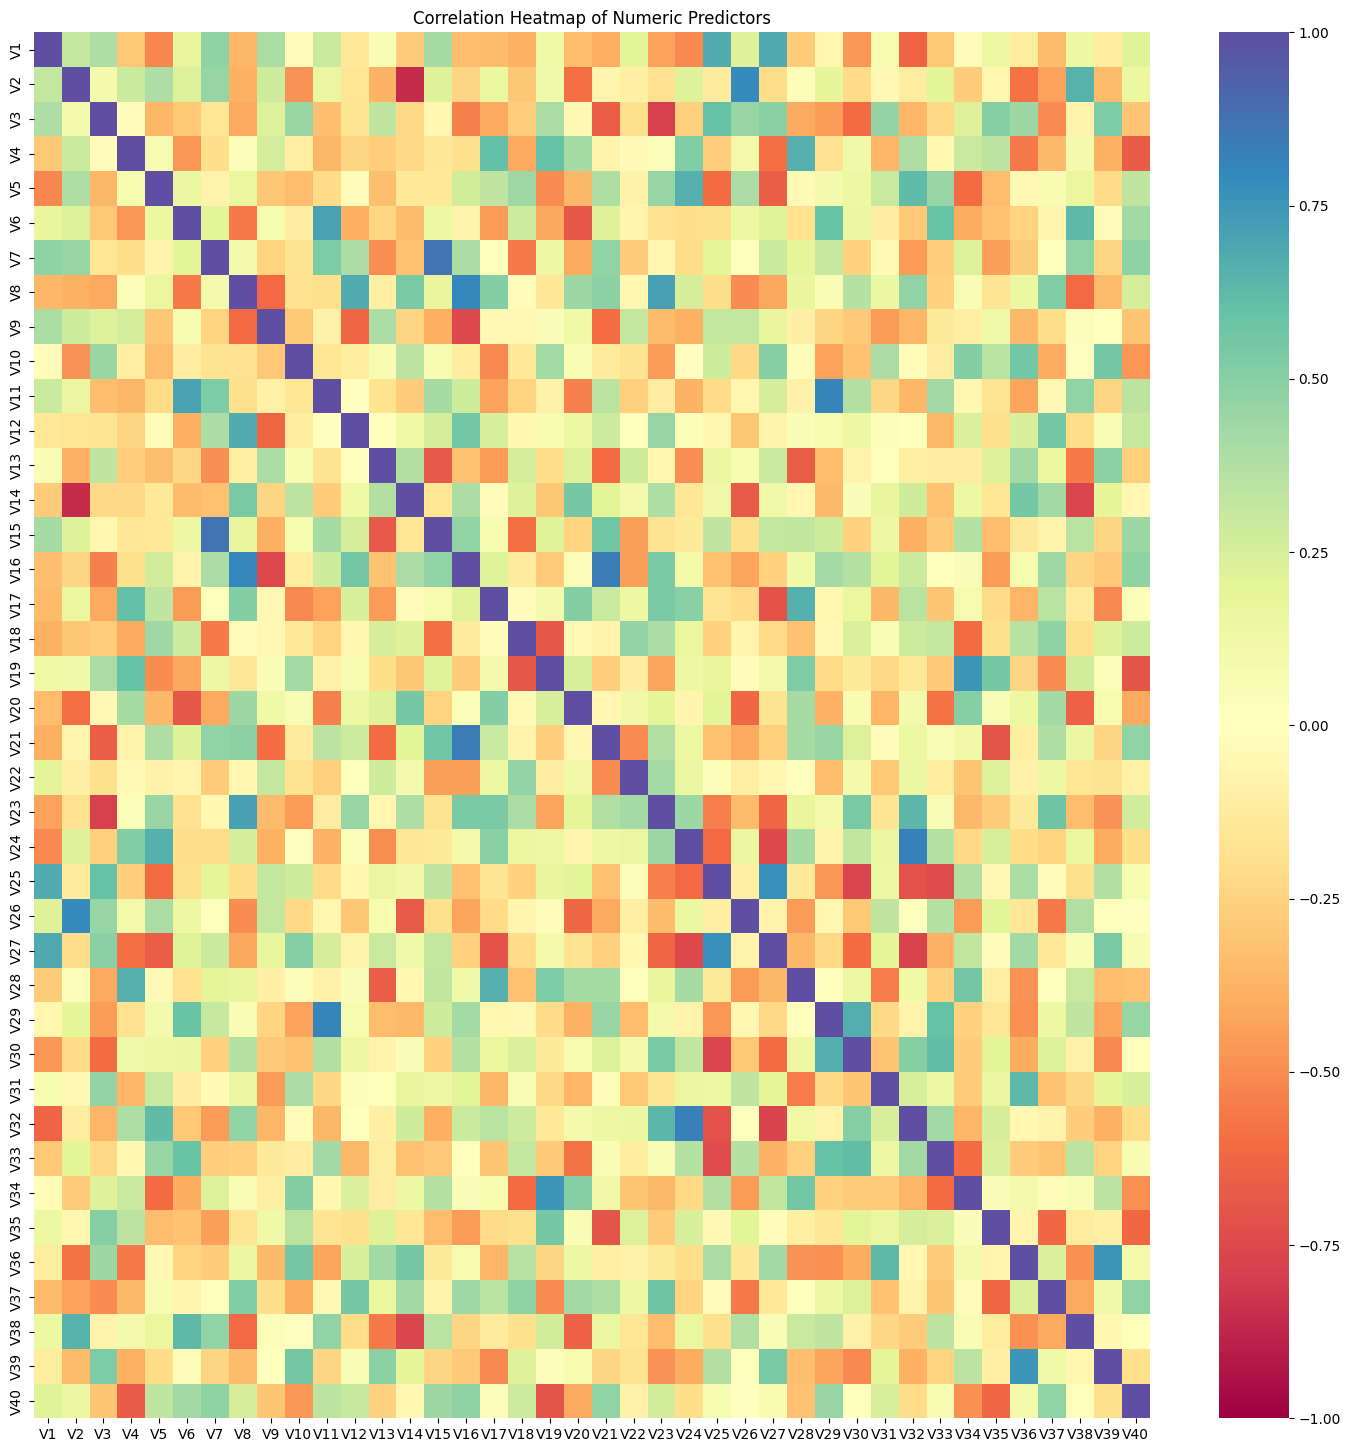

Notes:
- Strongly correlated features can be redundant.
- This is mainly diagnostic here; the NN can still handle correlated inputs.

B.3 Target distribution in the test data:
- Class 0: 94.36%
- Class 1: 5.64%

EDA complete.


In [23]:
# ============================================================
# 5 & 6. EXPLORATORY DATA ANALYSIS (EDA)
#    A) Univariate Analysis
#    B) Bivariate Analysis (with respect to Target)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# Helper: boxplot + histogram (fixed bins handling)
# ------------------------------------------------------------
def histogram_boxplot(df, feature, figsize=(12, 6), kde=False, bins=None):
    """
    Draws a boxplot (top) and histogram (bottom) for a numeric feature.
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # boxplot
    sns.boxplot(x=df[feature], ax=ax_box, showmeans=True, color="lightgray")

    # histogram — only pass bins if not None
    if bins is not None:
        sns.histplot(df[feature], kde=kde, bins=bins, ax=ax_hist)
    else:
        sns.histplot(df[feature], kde=kde, ax=ax_hist)

    # reference lines
    ax_hist.axvline(df[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist.axvline(df[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# A) UNIVARIATE ANALYSIS
# ============================================================
print("============================================================")
print("A) UNIVARIATE ANALYSIS")
print("============================================================\n")

# A.1 Target distribution
print("A.1 Target variable distribution (training data):")
if "Target" in data.columns:
    target_counts = data["Target"].value_counts(dropna=False)
    target_props  = data["Target"].value_counts(normalize=True, dropna=False)
    for cls in target_counts.index:
        print(f"- Class {int(cls)}: {target_counts[cls]} rows ({target_props[cls]*100:.2f}%)")
    print("\nInterpretation:")
    print("- Class 1 = failure.")
    print("- Class 0 = no failure.")
    print("- Class 1 is the minority class → we will need class weights / recall-aware metrics.\n")
else:
    print("- 'Target' column not found.\n")

# A.2 numeric features
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if "Target" in numeric_cols:
    numeric_cols.remove("Target")

print("A.2 Numeric features identified:")
print(f"- Count (excluding Target): {len(numeric_cols)}")
print(f"- Example features: {numeric_cols[:10]}\n")

# A.3 missing values
print("A.3 Missing values in training data:")
train_missing = data.isnull().sum()
if train_missing.sum() == 0:
    print("- No missing values detected.\n")
else:
    # show only columns that actually have missing values
    display(train_missing[train_missing > 0])
    print()

# A.4 summary stats
print("A.4 Summary statistics of numeric features:")
display(data[numeric_cols].describe().T)
print()

# A.5 plot distributions
print("A.5 Distribution plots for numeric features")
print("    (This will generate one boxplot + histogram per numeric column.)\n")
for col in numeric_cols:
    print(f"Univariate distribution for: {col}")
    histogram_boxplot(data, col)


# ============================================================
# B) BIVARIATE ANALYSIS (WITH RESPECT TO TARGET)
# ============================================================
print("============================================================")
print("B) BIVARIATE ANALYSIS (with respect to Target)")
print("============================================================\n")

# B.1 feature means by target
print("B.1 Mean of numeric features by target class (training data):")
if "Target" in data.columns:
    grouped_means = data.groupby("Target")[numeric_cols].mean().T
    display(grouped_means)
    print("Notes:")
    print("- Columns with large differences between Target=0 and Target=1 are more discriminative.\n")
else:
    print("- Skipping: 'Target' column not found.\n")

# B.2 correlation heatmap
print("B.2 Correlation heatmap for numeric predictors (training data):")
corr_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if "Target" in corr_cols:
    corr_cols.remove("Target")

plt.figure(figsize=(18, 18))
sns.heatmap(
    data[corr_cols].corr(),
    annot=False,
    cmap="Spectral",
    vmin=-1,
    vmax=1,
)
plt.title("Correlation Heatmap of Numeric Predictors")
plt.show()
print("Notes:")
print("- Strongly correlated features can be redundant.")
print("- This is mainly diagnostic here; the NN can still handle correlated inputs.\n")

# B.3 target distribution in test (to mirror train-side checks)
if "Target" in data_test.columns:
    print("B.3 Target distribution in the test data:")
    test_target_props = data_test["Target"].value_counts(normalize=True)
    for cls, prop in test_target_props.items():
        print(f"- Class {int(cls)}: {prop*100:.2f}%")
    print()
else:
    print("B.3 Test data does not contain 'Target' or is not available.\n")

print("EDA complete.")

In [24]:
# ============================================================
# 7. DATA PREPARATION FOR MODELING
#    Purpose: create train/validation/test sets and handle missing values
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 7.1 Separate features and target from the training data
X = data.drop(columns=["Target"])
y = data["Target"]

# 7.2 Create training and validation sets from the training data
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1,
    stratify=y,
)

print("7.1 Shapes after splitting original training data:")
print(f"- X_train: {X_train.shape}")
print(f"- X_val  : {X_val.shape}")

# 7.3 Prepare test features and target from the provided test data
X_test = data_test.drop(columns=["Target"])
y_test = data_test["Target"]

print(f"- X_test : {X_test.shape}\n")

# 7.4 Impute missing values using median (fit on train, apply to val/test)
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val   = pd.DataFrame(imputer.transform(X_val),   columns=X_train.columns)
X_test  = pd.DataFrame(imputer.transform(X_test),  columns=X_train.columns)

print("7.2 Missing values after imputation:")
print(f"- Train: {X_train.isnull().sum().sum()}")
print(f"- Val  : {X_val.isnull().sum().sum()}")
print(f"- Test : {X_test.isnull().sum().sum()}\n")

# 7.5 Convert targets to numpy arrays for Keras models
y_train = y_train.to_numpy()
y_val   = y_val.to_numpy()
y_test  = y_test.to_numpy()

print("Data preparation complete. Data is ready for model building.\n")

7.1 Shapes after splitting original training data:
- X_train: (16000, 40)
- X_val  : (4000, 40)
- X_test : (5000, 40)

7.2 Missing values after imputation:
- Train: 0
- Val  : 0
- Test : 0

Data preparation complete. Data is ready for model building.



In [25]:
# ============================================================
# 8. MODELING UTILITIES
#    Purpose: common functions for plotting and evaluating models
# ============================================================

from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report,
)

def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Evaluate a binary classification model that outputs probabilities.
    Returns accuracy, recall, precision, and F1 score as a DataFrame.
    """
    y_prob = model.predict(predictors)
    y_pred = (y_prob > threshold).astype(int)

    acc  = accuracy_score(target, y_pred)
    rec  = recall_score(target, y_pred)
    prec = precision_score(target, y_pred)
    f1   = f1_score(target, y_pred)

    return pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [rec],
            "Precision": [prec],
            "F1 Score": [f1],
        }
    )


def plot_history(history, metric_name):
    """
    Plot training vs validation metric curves from Keras history.
    """
    plt.figure()
    plt.plot(history.history[metric_name], label="Train")
    plt.plot(history.history["val_" + metric_name], label="Validation")
    plt.title(f"Model {metric_name.capitalize()}")
    plt.xlabel("Epochs")
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.show()

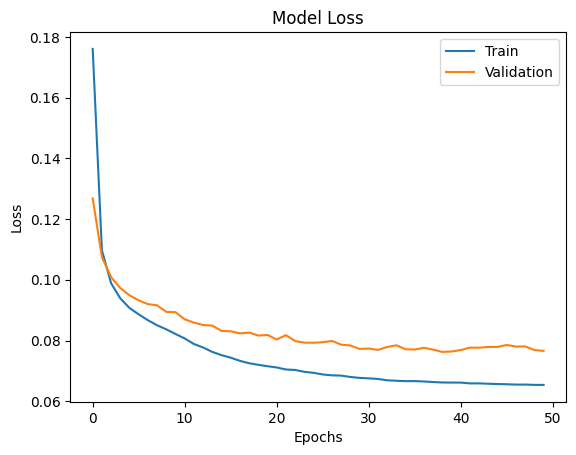

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
Model 0 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.984875,0.760135,0.958807,0.84799



Model 0 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.982,0.734234,0.926136,0.819095



Model 0 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3778
         1.0       0.93      0.73      0.82       222

    accuracy                           0.98      4000
   macro avg       0.96      0.87      0.90      4000
weighted avg       0.98      0.98      0.98      4000



In [26]:
# ============================================================
# 9. BASELINE MODEL (Model 0)
#    Purpose: establish a simple neural baseline
# ============================================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

epochs = 50
batch_size = 32
input_dim = X_train.shape[1]

tf.keras.backend.clear_session()
model_0 = Sequential()
model_0.add(Dense(7, activation="relu", input_dim=input_dim))
model_0.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD()
model_0.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_0 = model_0.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0,
)

plot_history(history_0, "loss")

model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_val_perf   = model_performance_classification(model_0, X_val, y_val)

print("Model 0 — Training performance")
display(model_0_train_perf)
print("\nModel 0 — Validation performance")
display(model_0_val_perf)

print("\nModel 0 — Classification report (validation)")
y_val_pred_0 = (model_0.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_0))

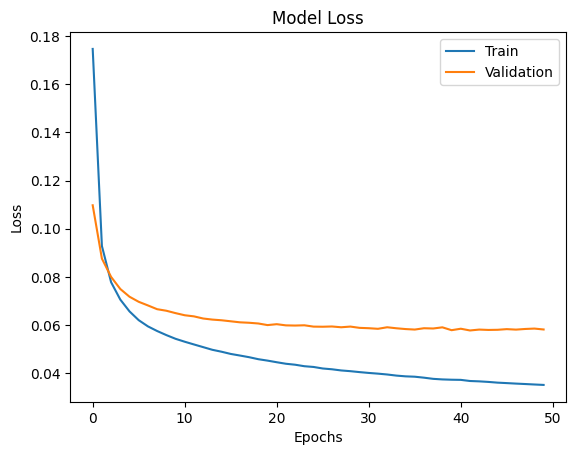

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
Model 1 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.993563,0.89527,0.987578,0.939161



Model 1 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.9915,0.864865,0.979592,0.91866



Model 1 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3778
         1.0       0.98      0.86      0.92       222

    accuracy                           0.99      4000
   macro avg       0.99      0.93      0.96      4000
weighted avg       0.99      0.99      0.99      4000



In [27]:
# ============================================================
# 10. MODEL 1 — DEEPER NETWORK
#    Purpose: check if added depth improves validation metrics
# ============================================================

tf.keras.backend.clear_session()
model_1 = Sequential()
model_1.add(Dense(32, activation="relu", input_dim=input_dim))
model_1.add(Dense(16, activation="relu"))
model_1.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD()
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_1 = model_1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0,
)

plot_history(history_1, "loss")

model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_val_perf   = model_performance_classification(model_1, X_val, y_val)

print("Model 1 — Training performance")
display(model_1_train_perf)
print("\nModel 1 — Validation performance")
display(model_1_val_perf)

print("\nModel 1 — Classification report (validation)")
y_val_pred_1 = (model_1.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_1))

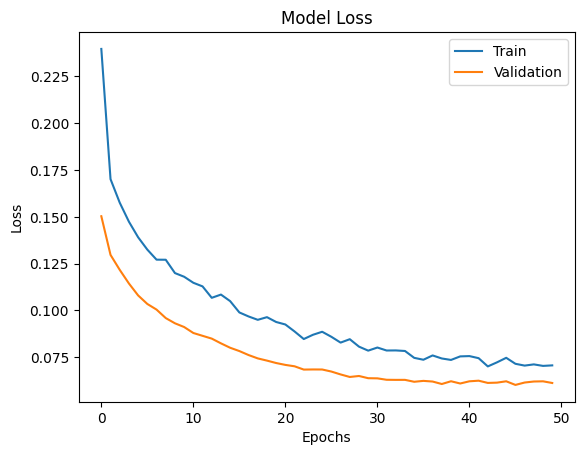

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
Model 2 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.989125,0.82545,0.974734,0.893902



Model 2 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.98925,0.833333,0.968586,0.895884



Model 2 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.97      0.83      0.90       222

    accuracy                           0.99      4000
   macro avg       0.98      0.92      0.95      4000
weighted avg       0.99      0.99      0.99      4000



In [28]:
# ============================================================
# 11. MODEL 2 — REGULARIZED NETWORK (DROPOUT)
#    Purpose: reduce overfitting observed in deeper models
# ============================================================

from tensorflow.keras.layers import Dropout

tf.keras.backend.clear_session()
model_2 = Sequential()
model_2.add(Dense(32, activation="relu", input_dim=input_dim))
model_2.add(Dropout(0.5))
model_2.add(Dense(16, activation="relu"))
model_2.add(Dense(8, activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD()
model_2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_2 = model_2.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0,
)

plot_history(history_2, "loss")

model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_val_perf   = model_performance_classification(model_2, X_val, y_val)

print("Model 2 — Training performance")
display(model_2_train_perf)
print("\nModel 2 — Validation performance")
display(model_2_val_perf)

print("\nModel 2 — Classification report (validation)")
y_val_pred_2 = (model_2.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_2))

In [29]:
# ============================================================
# 12. CLASS WEIGHTS FOR IMBALANCE
#    Purpose: give the minority class higher importance
# ============================================================

class_counts = np.bincount(y_train.astype(int))
class_weights = (y_train.shape[0]) / class_counts
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Class weights computed from training data:")
print(class_weight_dict)

Class weights computed from training data:
{0: np.float64(1.0587612493382743), 1: np.float64(18.01801801801802)}


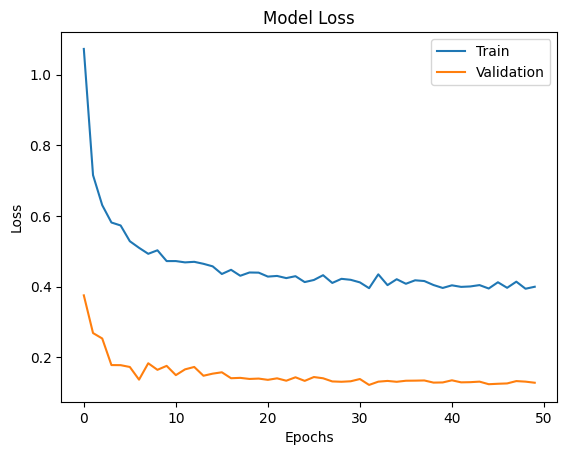

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
Model 3 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.990563,0.862613,0.963522,0.910279



Model 3 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.9895,0.846847,0.959184,0.899522



Model 3 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.96      0.85      0.90       222

    accuracy                           0.99      4000
   macro avg       0.98      0.92      0.95      4000
weighted avg       0.99      0.99      0.99      4000



In [30]:
# ============================================================
# 13. MODEL 3 — REGULARIZED + CLASS WEIGHTS
#    Purpose: improve recall on the failure class
# ============================================================

tf.keras.backend.clear_session()
model_3 = Sequential()
model_3.add(Dense(32, activation="relu", input_dim=input_dim))
model_3.add(Dropout(0.5))
model_3.add(Dense(16, activation="relu"))
model_3.add(Dense(8, activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD()
model_3.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_3 = model_3.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    class_weight=class_weight_dict,
    verbose=0,
)

plot_history(history_3, "loss")

model_3_train_perf = model_performance_classification(model_3, X_train, y_train)
model_3_val_perf   = model_performance_classification(model_3, X_val, y_val)

print("Model 3 — Training performance")
display(model_3_train_perf)
print("\nModel 3 — Validation performance")
display(model_3_val_perf)

print("\nModel 3 — Classification report (validation)")
y_val_pred_3 = (model_3.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_3))

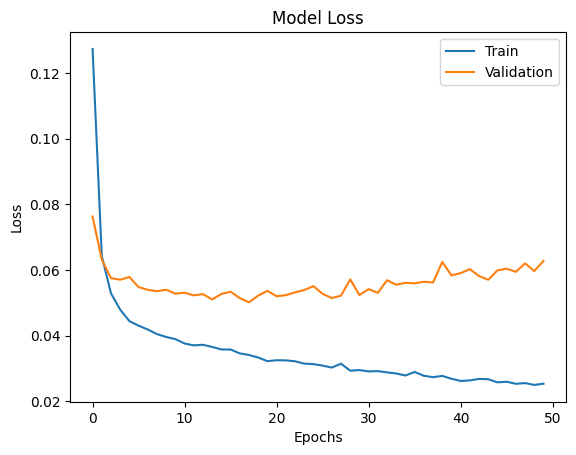

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
Model 4 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.994563,0.92455,0.976219,0.949682



Model 4 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.98975,0.887387,0.924883,0.905747



Model 4 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.92      0.89      0.91       222

    accuracy                           0.99      4000
   macro avg       0.96      0.94      0.95      4000
weighted avg       0.99      0.99      0.99      4000



In [31]:
# ============================================================
# 14. MODEL 4 — CHANGE OPTIMIZER TO ADAM
#    Purpose: check if a different optimizer improves convergence
# ============================================================

tf.keras.backend.clear_session()
model_4 = Sequential()
model_4.add(Dense(32, activation="relu", input_dim=input_dim))
model_4.add(Dense(16, activation="relu"))
model_4.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.Adam()
model_4.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_4 = model_4.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0,
)

plot_history(history_4, "loss")

model_4_train_perf = model_performance_classification(model_4, X_train, y_train)
model_4_val_perf   = model_performance_classification(model_4, X_val, y_val)

print("Model 4 — Training performance")
display(model_4_train_perf)
print("\nModel 4 — Validation performance")
display(model_4_val_perf)

print("\nModel 4 — Classification report (validation)")
y_val_pred_4 = (model_4.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_4))

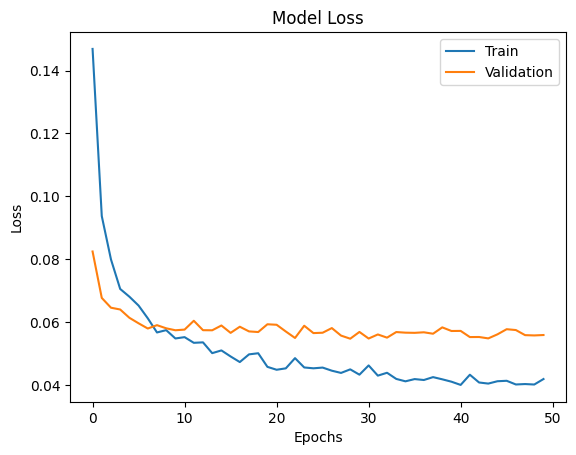

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
Model 5 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.993563,0.88964,0.993711,0.9388



Model 5 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.99175,0.864865,0.984615,0.920863



Model 5 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3778
         1.0       0.98      0.86      0.92       222

    accuracy                           0.99      4000
   macro avg       0.99      0.93      0.96      4000
weighted avg       0.99      0.99      0.99      4000



In [32]:
# ============================================================
# 15. MODEL 5 — DEEPER NETWORK WITH DROPOUT (ADAM)
#    Purpose: combine depth, regularization, and a stronger optimizer
# ============================================================

tf.keras.backend.clear_session()
model_5 = Sequential()
model_5.add(Dense(64, activation="relu", input_dim=input_dim))
model_5.add(Dropout(0.5))
model_5.add(Dense(32, activation="relu"))
model_5.add(Dense(16, activation="relu"))
model_5.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.Adam()
model_5.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_5 = model_5.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0,
)

plot_history(history_5, "loss")

model_5_train_perf = model_performance_classification(model_5, X_train, y_train)
model_5_val_perf   = model_performance_classification(model_5, X_val, y_val)

print("Model 5 — Training performance")
display(model_5_train_perf)
print("\nModel 5 — Validation performance")
display(model_5_val_perf)

print("\nModel 5 — Classification report (validation)")
y_val_pred_5 = (model_5.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_5))

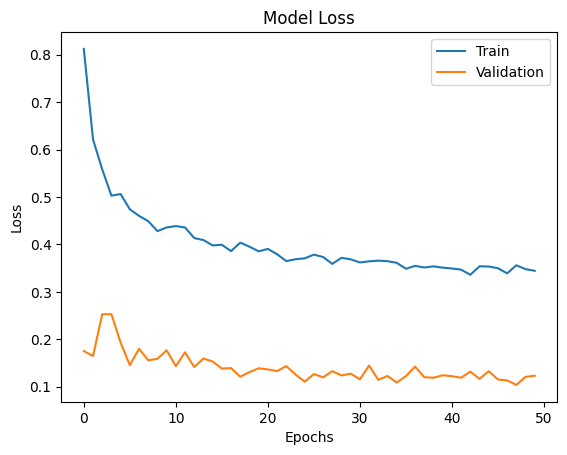

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
Model 6 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.992563,0.917793,0.946574,0.931961



Model 6 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.9915,0.887387,0.956311,0.920561



Model 6 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3778
         1.0       0.96      0.89      0.92       222

    accuracy                           0.99      4000
   macro avg       0.97      0.94      0.96      4000
weighted avg       0.99      0.99      0.99      4000



In [33]:
# ============================================================
# 16. MODEL 6 — DEEPER + CLASS WEIGHTS (SGD)
#    Purpose: deeper model but still correcting for imbalance
# ============================================================

tf.keras.backend.clear_session()
model_6 = Sequential()
model_6.add(Dense(64, activation="relu", input_dim=input_dim))
model_6.add(Dropout(0.5))
model_6.add(Dense(32, activation="relu"))
model_6.add(Dense(16, activation="relu"))
model_6.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD()
model_6.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_6 = model_6.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    class_weight=class_weight_dict,
    verbose=0,
)

plot_history(history_6, "loss")

model_6_train_perf = model_performance_classification(model_6, X_train, y_train)
model_6_val_perf   = model_performance_classification(model_6, X_val, y_val)

print("Model 6 — Training performance")
display(model_6_train_perf)
print("\nModel 6 — Validation performance")
display(model_6_val_perf)

print("\nModel 6 — Classification report (validation)")
y_val_pred_6 = (model_6.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_6))

In [34]:
# ============================================================
# 17. MODEL PERFORMANCE COMPARISON
#    Purpose: identify the best-performing model
# ============================================================

train_perf_comp = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
    ],
    axis=1,
)
train_perf_comp.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
]

val_perf_comp = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T,
    ],
    axis=1,
)
val_perf_comp.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
]

print("Training set performance comparison:")
display(train_perf_comp)

print("Validation set performance comparison:")
display(val_perf_comp)

Training set performance comparison:


,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
Accuracy,0.984875,0.993563,0.989125,0.990563,0.994563,0.993563,0.992563
Recall,0.760135,0.895270,0.825450,0.862613,0.924550,0.889640,0.917793
Precision,0.958807,0.987578,0.974734,0.963522,0.976219,0.993711,0.946574
F1 Score,0.847990,0.939161,0.893902,0.910279,0.949682,0.938800,0.931961


Validation set performance comparison:


,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
Accuracy,0.982000,0.991500,0.989250,0.989500,0.989750,0.991750,0.991500
Recall,0.734234,0.864865,0.833333,0.846847,0.887387,0.864865,0.887387
Precision,0.926136,0.979592,0.968586,0.959184,0.924883,0.984615,0.956311
F1 Score,0.819095,0.918660,0.895884,0.899522,0.905747,0.920863,0.920561


In [35]:
# ============================================================
# 18. TEST SET EVALUATION
#    Purpose: check generalization of the selected model
# ============================================================

# Select the model based on validation performance
best_model = model_5  # update this if another model performs better

test_perf = model_performance_classification(best_model, X_test, y_test)
print("Test set performance for the selected model:")
display(test_perf)

print("\nClassification report — test set")
y_test_pred = (best_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_test_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
Test set performance for the selected model:


,Accuracy,Recall,Precision,F1 Score
0,0.9914,0.85461,0.99177,0.918095



Classification report — test set
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4718
         1.0       0.99      0.85      0.92       282

    accuracy                           0.99      5000
   macro avg       0.99      0.93      0.96      5000
weighted avg       0.99      0.99      0.99      5000

